<style>
p {
  line-height: 1.5;
}
</style>

<center> WGU D206 Performance Assessment </center>
--
<center>Michael Hindes</center>
<center>Western Governors University</center>
<center>D206: Data Cleaning</center>
<center>Dr. Keiona Middleton</center>



# Part I: Research Question and Variables

## Background

- Medical readmissions are a pressing issue in healthcare, affecting not just patients but also the institutions that serve them. This challenge has even led the Centers for Medicare and Medicaid Services (CMS) to impose penalties on hospitals with high readmission rates (WGU, 2023). Despite the financial and reputational risks, many hospitals are not adequately prepared to tackle this problem. This performance assessment seeks to address this gap by identifying variables that may predict a patient's likelihood of returning to the emergency room. It serves as a pivotal part of the data analytics process aimed at improving healthcare outcomes.

## A. Research Question

- **Question**: Are there specific variables that can help predict the likelihood of a patient's re-admittance to the emergency room?
  - To tackle this question, the `'medical_raw_data.csv'` dataset (WGU, 2023) will be cleaned for analysis. After inspecting and understanding the data, cleaning will include handling missing values, duplicates, and outliers, re-expressing categorical variables, and performing principal component analysis for potential relationships in the data. This dataset is rich with a variety of variables that could influence a patient's chances of returning to the hospital.

## B. Variable Description

- **Variables**: 
  - The table below describes all variables in the dataset as received from an online source (WGU, 2023). The table includes the Variable name, Data type, Variable Type, Description, and an Example for every variable in the dataset.

- **Variable Categories**:
  - *Patient Characteristics*: Age, gender, and various health conditions.
  - *Hospital Stay Details*: Treatments administered, duration of hospitalization, and the nature of the patient's initial entry. Importantly, the dataset includes a 'ReAdmis' variable, which is a binary indication (Yes, No) of whether the patient was readmitted within a month of discharge.
  - *Health Issues*: Hypertension, cerebral incidents, excessive weight, joint inflammation, and sugar imbalances.
  - *Demographics*: Sex, age bracket, occupation, and educational background.


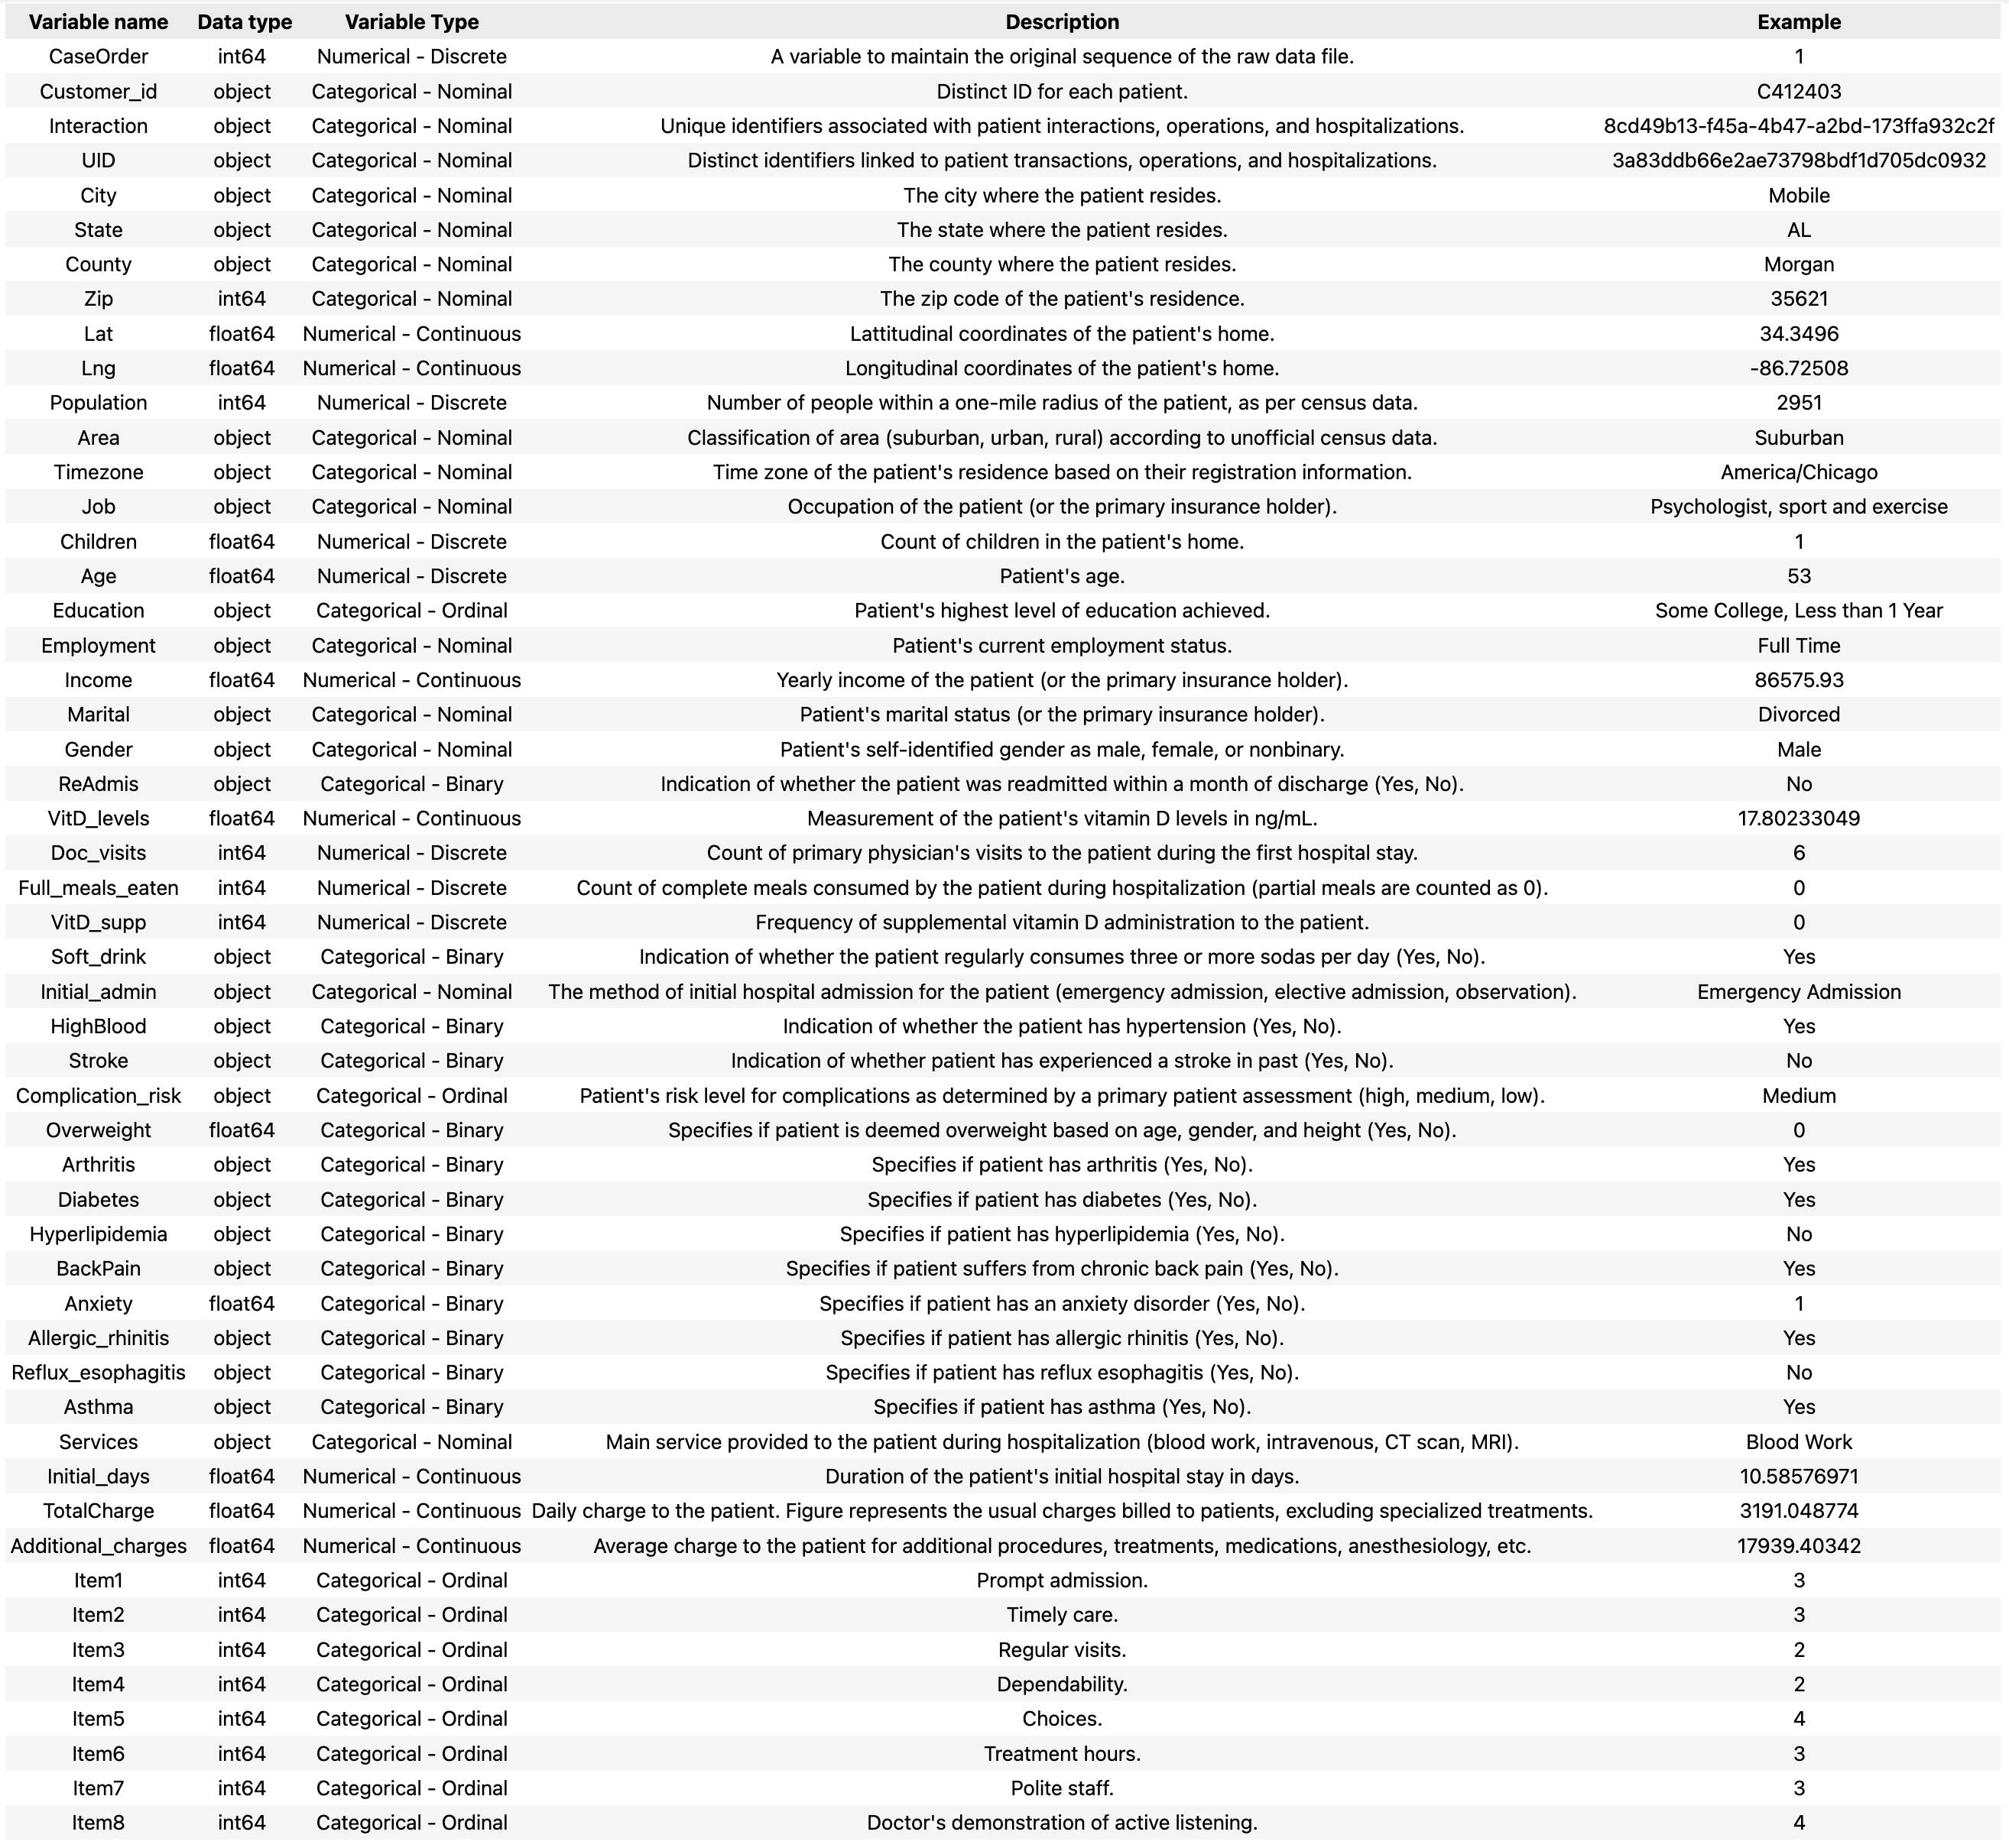

In [2]:
from IPython.display import Image
Image(filename='variables.png')


## Part II: Data-Cleaning Plan

### C. Methods used to detect data quality issues:
- The Data Cleaning plan includes importing and understanding the dataset, handling missing values, duplicates, and outliers, re-expressing categorical variables, and performing principal component analysis for potential relationships. The following is a description of the planned steps in the above processes (any additional steps that needed to be taken will be discussed further in the narrative):

  - Start by importing the data into a Pandas DataFrame using Python's `pd.read_csv()` function.
  - Gain an initial understanding of the DataFrame's structure with `df.head()`.
  - Check data types, columns, non-null values, and memory usage using `df.info()`.
  - Review unique values in the dataset with `df.unique()`.
  - Identify duplicate rows using `df.duplicated()` and decide on their treatment.
  - Detect missing values with `df.isnull().sum()`.
  - Calculate the percentage of missing values for each column using `df.isnull()`.
  - Visualize missing values using the `missingno` library. Employ `msno.matrix()` for a matrix plot and `msno.bar()` for a bar chart.
  - Examine the distribution of numerical values using matplotlib's `plt.hist(df['Columnname'])`.
  - If necessary, impute missing values using `fillna()`.
  - Verify the imputation with `fillna().sum` and re-examine the distribution using `plt.hist(df['Columnname'])`.
  - Detect and visualize outliers in quantitative variables using Seaborn’s `sns.boxplot()` and `sns.histplot()`.
  - For practice, transform categorical variables using `df.replace()`.
  - Conduct a principal component analysis to identify key features using `PCA()` from `sklearn.decomposition`.


#### Necessary Imports and Installs:
- `%pip install scikit-learn`: Scikit-learn is a machine learning library for Python, featuring various classification, regression, and clustering algorithms. It is used for Principal Component Analysis (PCA).
  
- `%pip install missingno`: Missingno is a Python library that provides a set of utilities for identifying and visualizing missing or null data. It is used for visualizing missing values in the data.
  
- `%pip install Jinja2`: Jinja2 is a templating engine for Python programming. It is used for text-based templating. Used to construct table.

- `%matplotlib inline`: This is a magic command in Jupyter Notebook that enables the inline backend for usage with IPython. It is used for allowing the output of plotting commands to be displayed directly within the Jupyter Notebook.

- `import pandas as pd`: Pandas is a Python library that offers data structures and operations for manipulating numerical tables and time series. It is used for tasks like reading the data, cleaning, and transformation.

- `import numpy as np`: NumPy is a Python library that provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions. It is used for numerical operations.

- `import matplotlib.pyplot as plt`: Matplotlib is a plotting library for Python and its numerical mathematics extension NumPy. It is used for data visualization, such as histograms and bar plots.

- `import scipy.stats as stats`: SciPy's stats module is a part of the SciPy library, which is used for scientific and technical computing in Python. It is used for statistical analysis.

- `import missingno as msno`: Missingno is a Python library that provides utilities for identifying and visualizing missing or null data. It is used for visualizing the distribution and amount of missing data.

- `import seaborn as sns`: Seaborn is a Python data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics. It is used for Hitograms and Bar Plots here.

- `from pandas import DataFrame`: The DataFrame class is a part of the Pandas library, which is used for data manipulation and analysis. 

- `from sklearn.decomposition import PCA`: The PCA class is a part of the scikit-learn library, which is a machine learning library in Python. It is used for Principal Component Analysis.



**Choice Of Python over R**

- Python was chosen as the primary programming language for this data cleaning project for its robust libraries, ease of use, and familiarity. The ecosystem includes important data manipulation and analysis libraries like Pandas, NumPy, and Scikit-learn, making Python well-suited for efficient data cleaning and transformation. Data visualization libraries such as Matplotlib and Seaborn offer intuitive ways to identify and understand data quality issues.

    There are some disadvantages to using Python over R. According to the IT department at Western Governors University, Python has fewer specialized data science libraries compared to R. Debugging in Python requires careful testing, as issues often appear during runtime. Additionally, generating visualizations in Python can be more complex, and the end results may not be as visually appealing or as informative as those in R (Western Governors University, 2023).

    The use of Jupyter Notebooks further enhances the workflow by providing an interactive and user-friendly documentation process. Given these factors and an existing familiarity with Python, it was considered the most appropriate choice for managing the complexities of this project.

**C4. Provide the annotated CODE you will use to assess the quality of the data in an executable script file.**

- Note: While this report largely adheres to the general outline provided in the project instructions there are intentional deviations in the organization of certain sections—specifically, sections C4, D, and E. <br><br> Due to the nature of the data cleaning and analysis process, tasks like treating missing values, detecting outliers, explaining limitations, and performing Principal Component Analysis (PCA) are logically conducted in tandem with their respective code blocks in the Jupyter Notebook. <br><br>This approach allows for a more coherent and practical workflow. For instance, the methods for mitigating data quality issues (Section D) are closely integrated with the annotated code used to assess data quality (Section C4). Similarly, discussions of limitations per D6 were unique to and specific to certian values, like seen in `Soft_drink` for example, were clearer in the context for which they appeared and were dealt with. 

In [1]:
# Import packages and libraries
%pip install scikit-learn
%pip install missingno
%pip install Jinja2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
import seaborn as sns
from pandas import DataFrame
from sklearn.decomposition import PCA

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


- Import the data and read it into a dataframe. <br><br>Set the maximum number of columns to display to None so that all columns will be displayed. Examine the first five rows of the data to confirm loading.

In [3]:
# import the data and read it into a dataframe
df = pd.read_csv('medical_raw_data.csv')

# Set the maximum number of columns to display to 6 to save space for exersize
pd.set_option('display.max_columns', 6)

# Display the first five rows of the data
df.head()

,Unnamed: 0,CaseOrder,Customer_id,...,Item6,Item7,Item8
0,1,1,C412403,...,3,3,4
1,2,2,Z919181,...,4,3,3
2,3,3,F995323,...,4,3,3
3,4,4,A879973,...,5,5,5
4,5,5,C544523,...,3,4,3


- Before any detection or cleaning take place an `Index` Issue will be addressed. <br><br>
- `Unnamed: 0` is not part of the dataset dictionary, and is likley the result of when a DataFrame is saved to a CSV file with the index included, and then loaded back into a new DataFrame. For the sake of thoroughness and to be sure the original order of the rows is retained, the column `Unnamed: 0` will be dropped. A new column will be added and set as `Index`, and a sequence of integers that are the same length as the DataFrame will be generated as the values for the `Index`, starting at `0`. 

In [4]:
# Drop 'Unnamed: 0' column.
df = df.drop('Unnamed: 0', axis=1)

# add a new column to the dataframe called 'Index' that will be used as the index
df['Index'] = range(len(df))

# set the index to the new 'Index' column
df = df.set_index('Index')

- Confirm the index was set correctly by viewing the first 5 rows of the DataFrame.

In [5]:
# View the first 5 rows of the dataframe
df.head()

,CaseOrder,Customer_id,Interaction,...,Item6,Item7,Item8
Index,,,,,,,
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,...,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,...,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,...,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,...,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,...,3,4,3


- Confirm the index was set correctly by viewing the last 5 rows of the DataFrame.

In [6]:
# View the last 5 rows of the dataframe
df.tail()

,CaseOrder,Customer_id,Interaction,...,Item6,Item7,Item8
Index,,,,,,,
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,...,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,...,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,...,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,...,3,4,3
9999,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,...,6,4,3


- Verify the shape (number of rows, columns) of the DataFrame.

In [7]:
# Understanding the Data
# Check the shape of the DataFrame. df.shape returns a tuple: ([0],[1]) = (rows, columns)
print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 10000
Total columns: 52


- Verify the data types, columns, non-null values, and memory usage of the DataFrame

In [8]:
# Check the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education 

- Viewing the number of unique values helps paint a better picture of the data. Particularly if there unique value counts that fall outside of the expected range, which can indicate an issue with the data. The number of unique values for each column will be displayed.

In [9]:
# View the number of unique values for each column
df.nunique()

CaseOrder             10000
Customer_id           10000
Interaction           10000
UID                   10000
City                   6072
State                    52
County                 1607
Zip                    8612
Lat                    8588
Lng                    8601
Population             5951
Area                      3
Timezone                 26
Job                     639
Children                 11
Age                      72
Education                12
Employment                5
Income                 7531
Marital                   5
Gender                    3
ReAdmis                   2
VitD_levels           10000
Doc_visits                9
Full_meals_eaten          8
VitD_supp                 6
Soft_drink                2
Initial_admin             3
HighBlood                 2
Stroke                    2
Complication_risk         3
Overweight                2
Arthritis                 2
Diabetes                  2
Hyperlipidemia            2
BackPain            

- The 'States' column has 52 unique values, which suggests there may be a selling error or 2 additional values. 

In [10]:
#print the unique values for the column called State
print(df['State'].unique())

['AL' 'FL' 'SD' 'MN' 'VA' 'OK' 'OH' 'MS' 'WI' 'IA' 'CA' 'IN' 'MO' 'MI'
 'NE' 'PA' 'AR' 'WV' 'KS' 'MA' 'KY' 'NY' 'VT' 'DC' 'IL' 'ND' 'SC' 'AK'
 'NM' 'NH' 'GA' 'NC' 'MD' 'TN' 'WA' 'TX' 'CO' 'NJ' 'LA' 'OR' 'AZ' 'ME'
 'ID' 'UT' 'RI' 'MT' 'PR' 'NV' 'CT' 'HI' 'WY' 'DE']


- Puerto Rico and District of Columbia are the extra 2 State values, which are legitimate and will remain.

- There are several valiables with 10000 unique values. <br><br>Given that this dataset contains 10000 records, this suggests that there may be no duplicated records. This will be confirmed by checking for duplicate rows specifically.

# Part III: Data Cleaning


### Duplicates - Detection and Treatment
- Detection of duplicates using the `duplicated()` method, which returns series of boolean values for each row: `True` for a duplicate row and `False` if the row is not a duplicate. <br><br>Due to the large number of rows, the `value_counts()` method is used to count the number of `True` and `False` values returned by the `df.duplicated()` method. `df.duplicated().sum()` is used to provide additional conformation by summing the total number of `True` values returned by the `duplicated()` method in an clear mannar. 

In [11]:
# Check for duplicate rows. Count the number of True and False values returned by df.duplicated().
print(df.duplicated().value_counts())

# Display the count of duplicate rows
print('Total Duplicate Rows:', df.duplicated().sum())

False    10000
Name: count, dtype: int64
Total Duplicate Rows: 0


- There is no need to treat duplicates as all rows are confirmed unique.

### Missing Values - Detection


- Detection and treatment of missing values begin by using `df.isnull().sum()`, which returns `True` if the value is null and `False` if the value is not null. `True` values are then summed and returned for each column.
  
- To keep things more efficient, a list of only those variables with missing values will be created by displaying only those columns with `missing values greater than 0`.

In [63]:
# The isnull() method creates a boolean DataFrame indicating which cells in df are null or missing values. 
# The sum() method then sums the number of True values in each column of the boolean DataFrame and returns a 
# new Series with the sums.
null_cols = df.isnull().sum()

#  Create a boolean Series indicating which columns have missing values. 
# Assigns only those values in null_cols that are greater than 0 to missing. (only rows with missing values)
missing = null_cols > 0

# Print the count of missing values for each column with missing values, sorted in descending order
print('Number of missing values per column:')
print(null_cols[missing].sort_values(ascending=False))

Number of missing values per column:
Series([], dtype: int64)


- To visualize possible patterns of missing values in the DataFrame, the `Missingno` Python library will be used to generate a `matrix()` plot to visualize the distribution of the missing values, and a `bar()` plot to visualize the percentage of missing values per variable.


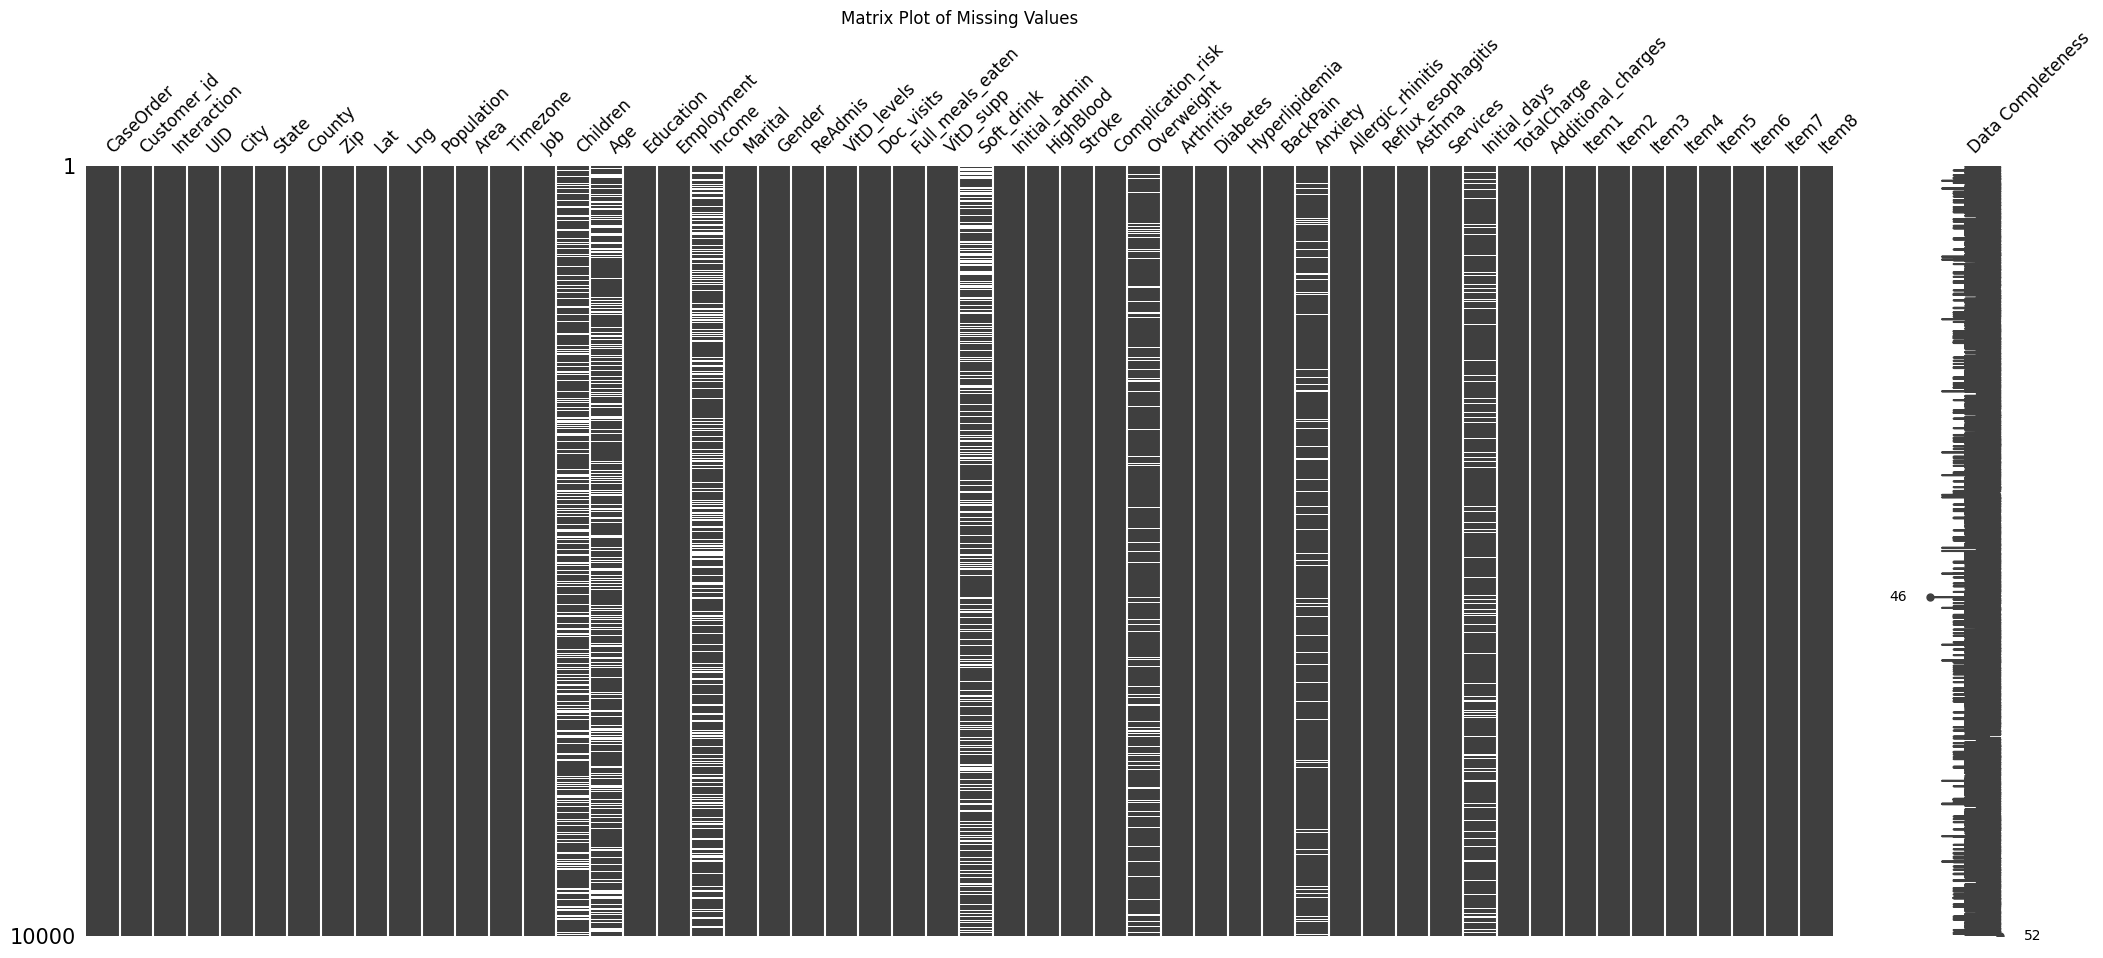

In [13]:
# Creat a matrix plot to visualize distribution the missing values in the dataset using the missingno library.
msno.matrix(df, fontsize=12, labels=True)
plt.title('Matrix Plot of Missing Values')
plt.show()

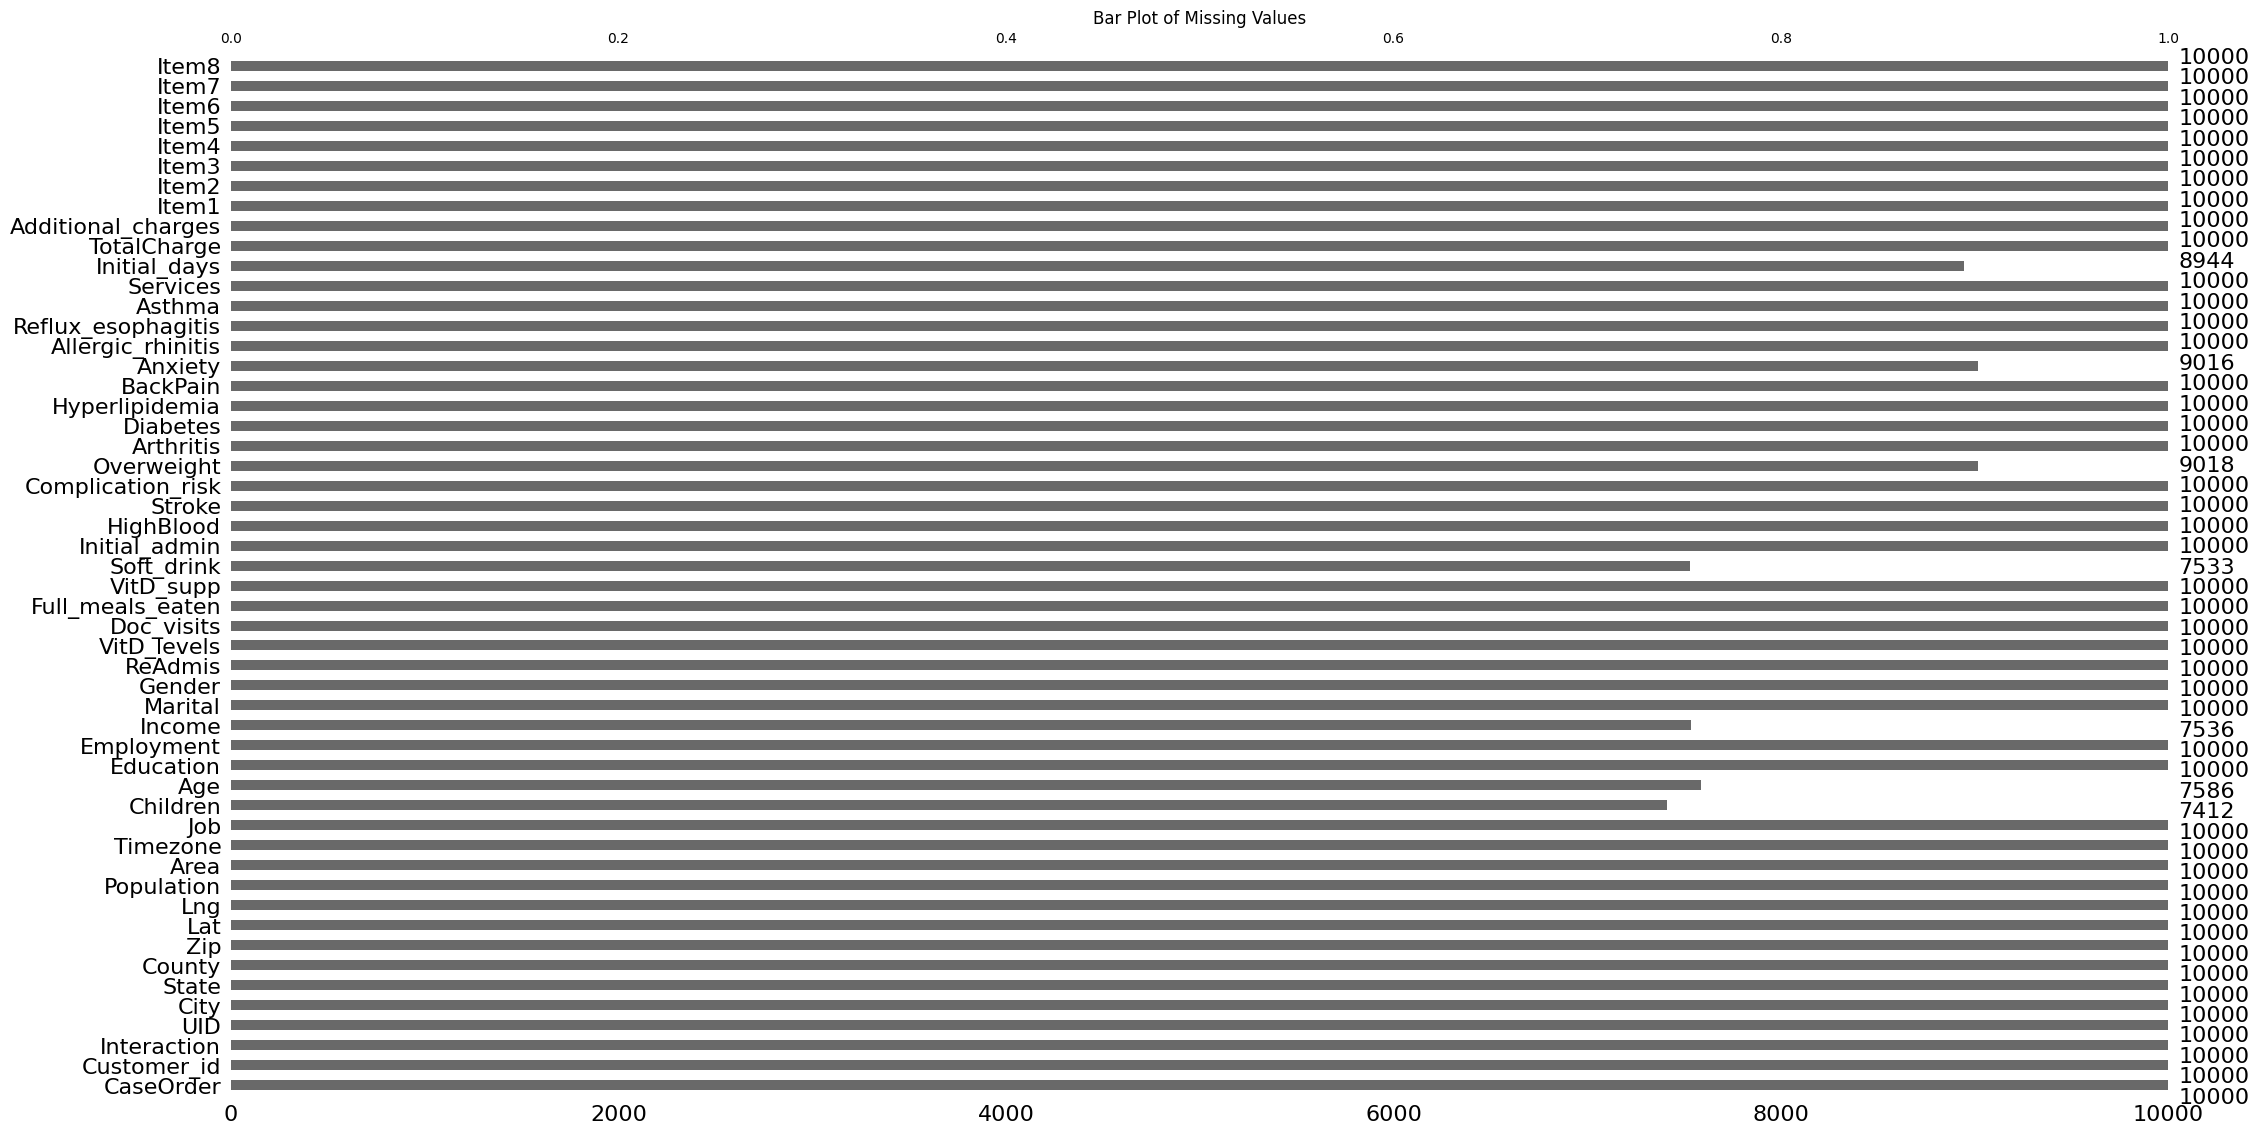

In [14]:
# Visualize the missing values in the dataset using the missingno library.
msno.bar(df)
plt.title('Bar Plot of Missing Values')
plt.show()

- The `matrix` plot seems to show that the distribution of missing values across the dataset appears random. However, both plots reveal that there is a pattern in the number of missing values between *two pseudo-groups of variables*. <br><br>This is evident in the density of the missing values in the `matrix` plot, and particularly in the length of the bars in the `bar` plot. <br><br>One of the pseudo-groups, `(group1)`, contains the variables `Overweight`, `Anxiety`, and `Initial_days`. <br><br>The second pseudo-group, `(group2)`, is made up of the variables `Children`, `Age`, `Income`, and `Soft_drink`. This may be of interest and may warrant further investigation as the number of missing variables in the two pseudo-groups is so similar.
  
- Next, the percentage of missing values in the columns with missing values is displayed to help determine how the missing values should be treated. Notice again the pseudo-grouping; `group1` has just about 10% of values missing and `group2` has about 25% of values missing from their respective columns.


In [15]:
# The isnull() method creates a boolean DataFrame indicating which cells in df are null or missing values.
# Identify columns with missing values
null_cols = df.isnull().sum()

# Create a boolean Series indicating which columns have missing values
missing = null_cols > 0

# Calculate the percentage of missing values in only each column with missing values. By using the missing variable to index the null_cols variable, only the columns that have missing values are selected. Then a standard % calculation is performed by dividing the number of missing values in each column by the total number of rows in the dataset and multiplying by 100.
missing_percentage = null_cols[missing] / df.shape[0] * 100

# Print the number of missing values per column and the percentage of missing values in each column with missing values
print('Percentage of missing values in each column with missing values:')
print(missing_percentage)

Percentage of missing values in each column with missing values:
Children        25.88
Age             24.14
Income          24.64
Soft_drink      24.67
Overweight       9.82
Anxiety          9.84
Initial_days    10.56
dtype: float64


### Missing Values - Treatment

- Given that the percentage of missing values is all 26% or less, imputation is preferred over deletion. As part of determining the best imputation method for each variable, numerical, statistical, and distributional examinations of the data for each column with missing values will be carried out. The type of examination and imputation also depends on the type of data in each column.


#### To determine the imputation method, the following guidelines will be followed for each column with missing values:

#### Examine Distribution:

- Check for skewness and/or symmetry using `plt.hist(df['Columnname'])` to create a histogram.
- View summary statistics pre-imputation to compare with post-imputation. This includes, but is not limited to, `null` and `unique` values, as well as `mean` and `median`.

#### Perform Imputation

Use the `fillna()` function with the following guidelines:

- `Mean` will be used for columns with Normal / Uniform Distribution.
- `Median` will be used for columns with Skewed Distributions.
- `Mode` will be used for categorical/nominal variables and some Bi-modal distributions.
  
> Note: The choice between mean, median, and mode is dependent on pre- and post-imputation statistical variations.


#### Verification

After imputation is performed:

- Use the `isnull().sum()` function to verify if the missing values are resolved.
- Use `plt.hist(df['Columnname'])` to verify that the distribution is in relative alignment with the distribution prior to imputation.

---
#### **`<BEGIN IMPUTATION>`**

- For each variable to be imputed, a temporary column/variable called `_temp` will first be created to test and verify imputation methods before performing the final imputation. This is for more efficient testing and verification and to help prevent altering the actual DataFrame with incorrect imputation. For each variable, `_temp` will then be dropped after final imputation is performed.


#### <span style="color:darkblue">Impute Soft_drink Values</span>

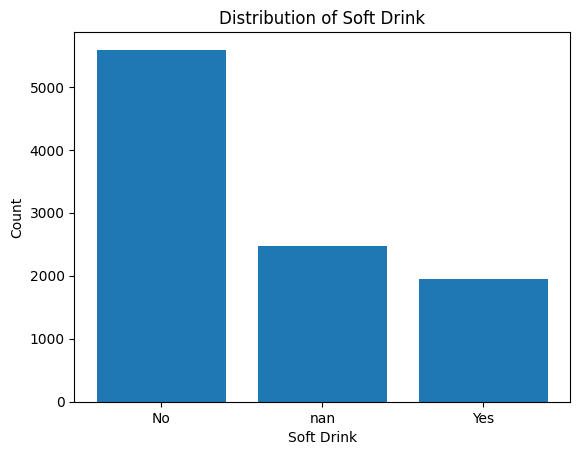

Nulls before imputation:  2467
Unique value counts:
Soft_drink
No     5589
Yes    1944
Name: count, dtype: int64
count     7533
unique       2
top         No
freq      5589
Name: Soft_drink, dtype: object


In [16]:
# Count the occurrences of each category, including null values
v_counts = df['Soft_drink'].value_counts(dropna=False)

# Create the bar plot using the pyplot bar() method
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Soft Drink')
plt.ylabel('Count')
plt.title('Distribution of Soft Drink')

# Show the plot
plt.show()

# Output information about the 'Soft_drink' column
print('Nulls before imputation: ', df['Soft_drink'].isna().sum())
print('Unique value counts:', df['Soft_drink'].value_counts(), sep='\n')
print(df['Soft_drink'].describe())

- The `Soft_drink` variable presents a nuanced challenge for imputation for several reasons. <br><br>This column is designed to indicate whether a patient regularly consumes three or more sodas per day (Yes, No). However, in the context of medical data and  research question—predicting the likelihood of readmission to the emergency room—the definition of "Soft drink" or "soda" is ambiguous. The term could encompass a range of beverages with varying ingredients, caffeine content, caloric values, and sugar levels, each of which could significantly impact a patient's health and physiology.

- The distribution of responses is approximately 3:1 (No:Yes), and about 25% of the values are missing. Using the median or mode for imputation could significantly skew the data. While random imputation could maintain the original distribution, the vagueness surrounding the term "Soft drink" makes this approach less than ideal.

- Given the potential impact of soft drink consumption on patient readmission rates, it is crucial to handle this variable with care. Therefore, the missing values will be imputed with a 'missing' category.

- Additionally, although the `Overweight` and `Anxiety` columns have about 10% of their data missing, imputing with the mode could introduce bias since they are binary categorical values. For these reasons, and with no further information available to better understand the nature of these variables, `Overweight` and `Anxiety` will also be imputed with 'Missing'. <br><br>This strategy preserves the integrity of the original data and allows for flexibility in future analyses. Users of this dataset can then decide on the most suitable strategy for handling these "missing" values based on their specific analytical requirements.


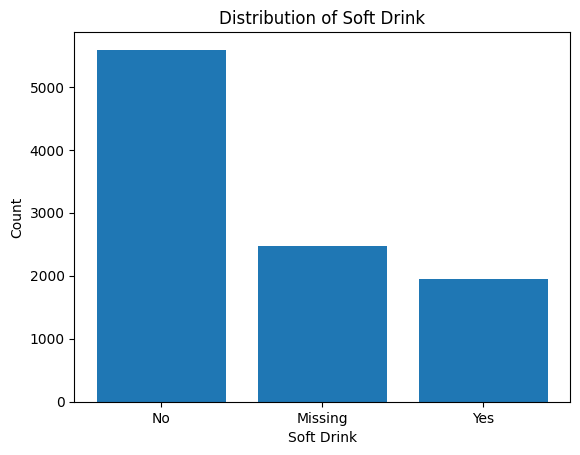

Nulls before imputation:  0
Unique value counts:
_temp
No         5589
Missing    2467
Yes        1944
Name: count, dtype: int64
count     10000
unique        3
top          No
freq       5589
Name: _temp, dtype: object


In [17]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed. 
df['_temp'] = df['Soft_drink']
df['_temp'] = df['Soft_drink'].fillna('Missing')

# View histogram of _temp column to see the distribution of values
# Count the occurrences of each category, including null values
v_counts = df['_temp'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Soft Drink')
plt.ylabel('Count')
plt.title('Distribution of Soft Drink')

# Show the plot
plt.show()

# Output information about the '_temp' column
print('Nulls before imputation: ', df['_temp'].isna().sum())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
print(df['_temp'].describe())

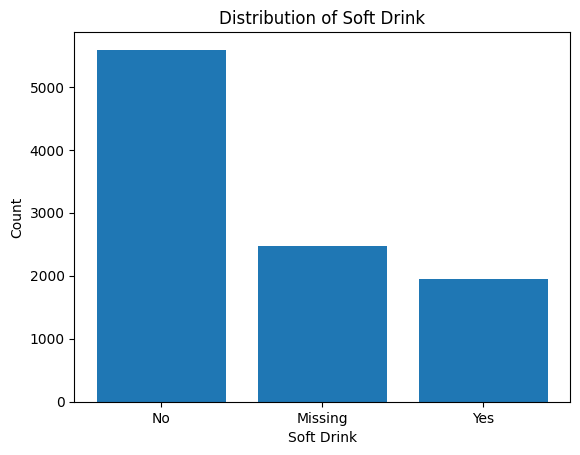

Nulls after imputation:  0
Unique value counts:
Soft_drink
No         5589
Missing    2467
Yes        1944
Name: count, dtype: int64
count     10000
unique        3
top          No
freq       5589
Name: Soft_drink, dtype: object


In [18]:
# Actual imputation of missing values
df['Soft_drink'].fillna('Missing', inplace=True)

# View histogram of _temp column to see the distribution of values
# Count the occurrences of each category, including null values
v_counts = df['Soft_drink'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Soft Drink')
plt.ylabel('Count')
plt.title('Distribution of Soft Drink')

# Show the plot
plt.show()

print('Nulls after imputation: ', df['Soft_drink'].isna().sum())
print('Unique value counts:', df['Soft_drink'].value_counts(), sep='\n')
# print('Median:', (df['Soft_drink'].median()))
print(df['Soft_drink'].describe())


#### <span style="color:darkblue"> /Soft_drink Imputed</span>


---
#### <span style="color:purple">Impute Overweight Values</span>

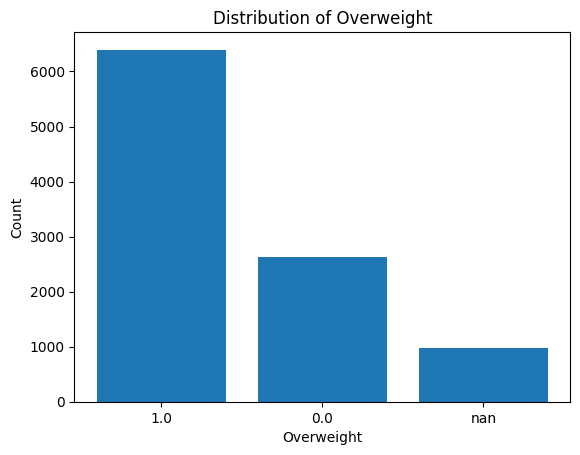

Nulls before imputation:  982
Unique value counts:
Overweight
1.0    6395
0.0    2623
Name: count, dtype: int64
Median: 1.0
count    9018.000000
mean        0.709137
std         0.454186
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Overweight, dtype: float64


In [19]:
# Count the occurrences of each category, including null values
v_counts = df['Overweight'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.title('Distribution of Overweight')

# Show the plot
plt.show()

# Output Information about the 'Overweight' column
print('Nulls before imputation: ', df['Overweight'].isna().sum())
print('Unique value counts:', df['Overweight'].value_counts(), sep='\n')
print('Median:', (df['Overweight'].median()))
print(df['Overweight'].describe())

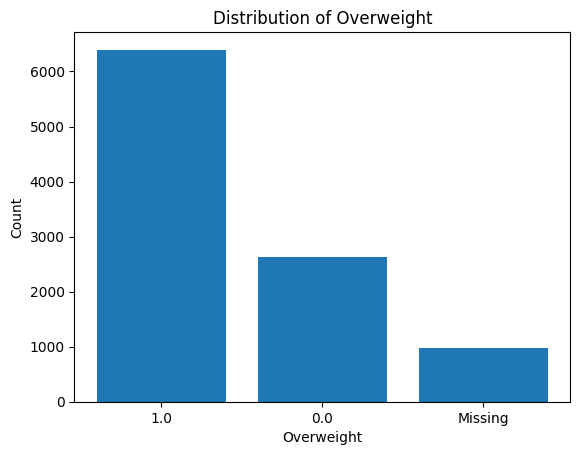

Nulls before imputation:  0
Unique value counts:
_temp
1.0        6395
0.0        2623
Missing     982
Name: count, dtype: int64
count     10000.0
unique        3.0
top           1.0
freq       6395.0
Name: _temp, dtype: float64


In [20]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed
df['_temp'] = df['Overweight']
df['_temp'] = df['Overweight'].fillna('Missing')

# View histogram of _temp column to see the distribution of values
# Count the occurrences of each category, including null values
v_counts = df['_temp'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.title('Distribution of Overweight')

# Show the plot
plt.show()

# Output Information about the '_temp' column
print('Nulls before imputation: ', df['_temp'].isna().sum())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
# print('Median:', (df['Soft_drink'].median()))
print(df['_temp'].describe())

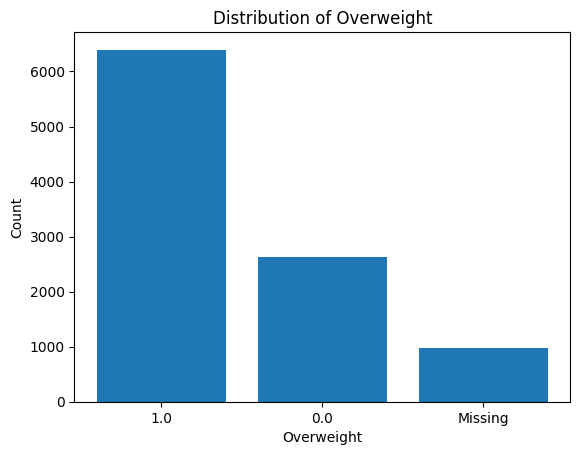

Nulls after imputation:  0
Unique value counts:
Overweight
1.0        6395
0.0        2623
Missing     982
Name: count, dtype: int64
count     10000.0
unique        3.0
top           1.0
freq       6395.0
Name: Overweight, dtype: float64


In [21]:
# Actual imputation of missing values
df['Overweight'].fillna('Missing', inplace=True)

# View histogram of _temp column to see the distribution of values
# Count the occurrences of each category, including null values
v_counts = df['Overweight'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.title('Distribution of Overweight')

# Show the plot
plt.show()

# Final output Information about the 'Overweight' column
print('Nulls after imputation: ', df['Overweight'].isna().sum())
print('Unique value counts:', df['Overweight'].value_counts(), sep='\n')
# print('Median:', (df['Soft_drink'].median()))
print(df['Overweight'].describe())


#### <span style="color:purple"> /Overweight Imputed</span>


---
#### <span style="color:orange">Impute Anxiety Values</span>

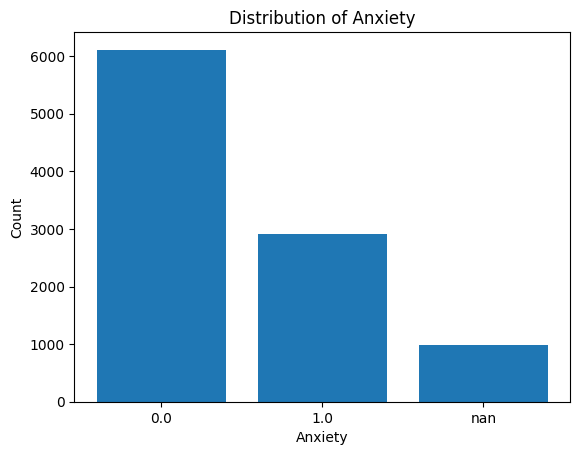

Nulls before imputation:  984
Unique value counts:
Anxiety
0.0    6110
1.0    2906
Name: count, dtype: int64
Median: 0.0
count    9016.000000
mean        0.322316
std         0.467389
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Anxiety, dtype: float64


In [22]:
# Count the occurrences of each category, including null values
v_counts = df['Anxiety'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Anxiety')
plt.ylabel('Count')
plt.title('Distribution of Anxiety')

# Show the plot
plt.show()

# Output Information about the 'Anxiety' column
print('Nulls before imputation: ', df['Anxiety'].isna().sum())
print('Unique value counts:', df['Anxiety'].value_counts(), sep='\n')
print('Median:', (df['Anxiety'].median()))
print(df['Anxiety'].describe())

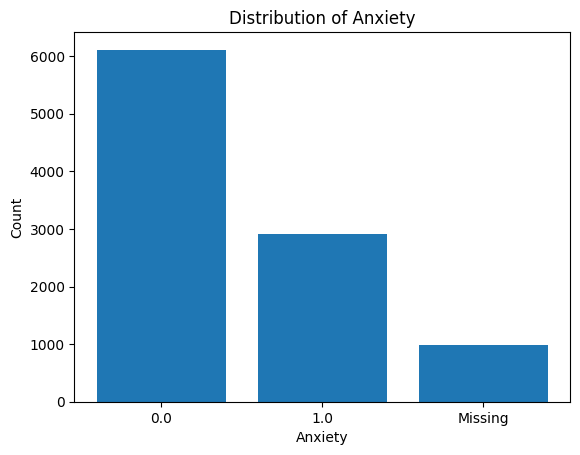

Nulls before imputation:  0
Unique value counts:
_temp
0.0        6110
1.0        2906
Missing     984
Name: count, dtype: int64
count     10000.0
unique        3.0
top           0.0
freq       6110.0
Name: _temp, dtype: float64


In [23]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed
df['_temp'] = df['Anxiety']
df['_temp'] = df['Anxiety'].fillna('Missing')

# View histogram of _temp column to see the distribution of values
# Count the occurrences of each category, including null values
v_counts = df['_temp'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Anxiety')
plt.ylabel('Count')
plt.title('Distribution of Anxiety')

# Show the plot
plt.show()

# Output Information about the '_temp' column
print('Nulls before imputation: ', df['_temp'].isna().sum())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
# print('Median:', (df['Soft_drink'].median()))
print(df['_temp'].describe())

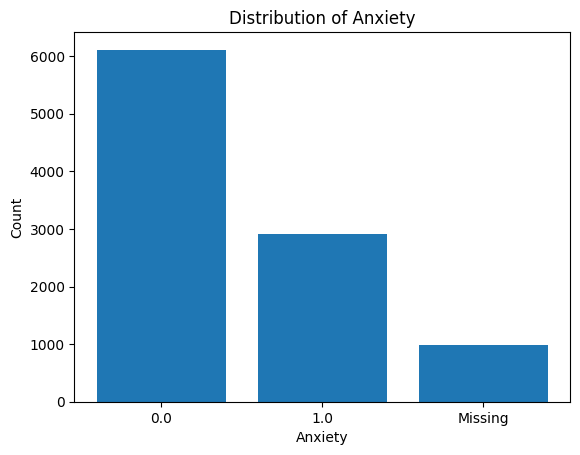

Nulls after imputation:  0
Unique value counts:
Anxiety
0.0        6110
1.0        2906
Missing     984
Name: count, dtype: int64
count     10000.0
unique        3.0
top           0.0
freq       6110.0
Name: Anxiety, dtype: float64


In [24]:
# Actual imputation of missing values
df['Anxiety'].fillna('Missing', inplace=True)

# View histogram of _temp column to see the distribution of values
# Count the occurrences of each category, including null values
v_counts = df['Anxiety'].value_counts(dropna=False)

# Create the bar plot
plt.bar(v_counts.index.astype(str), v_counts)

# Set x-axis tick labels
plt.xticks(v_counts.index.astype(str), v_counts.index.astype(str))

# Set labels and title
plt.xlabel('Anxiety')
plt.ylabel('Count')
plt.title('Distribution of Anxiety')

# Show the plot
plt.show()

# Output Information about the 'Anxiety' column
print('Nulls after imputation: ', df['Anxiety'].isna().sum())
print('Unique value counts:', df['Anxiety'].value_counts(), sep='\n')
# print('Median:', (df['Soft_drink'].median()))
print(df['Anxiety'].describe())


#### <span style="color:orange"> /Anxiety Imputed</span>


---
#### <span style="color:green">Impute Children Values</span>

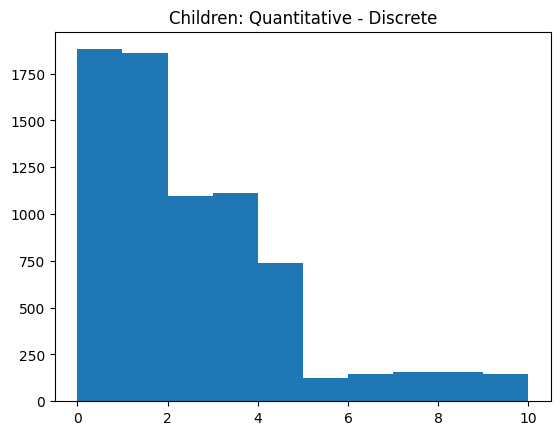

**!PRE IMPUTATION!**
Nulls before imputation:  2588
Total Unique: 11
Unique value counts:
Children
0.0     1880
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: count, dtype: int64
Median: 1.0
count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64


In [25]:
# View histogram of Children column to see the distribution of values
plt.hist(df['Children'])
plt.title('Children: Quantitative - Discrete')
plt.show()


# print the median of the Children column
print('**!PRE IMPUTATION!**')
print('Nulls before imputation: ', df['Children'].isnull().sum())
print('Total Unique:', df['Children'].nunique())
print('Unique value counts:', df['Children'].value_counts(), sep='\n')
print('Median:', df['Children'].median())
print(df['Children'].describe())

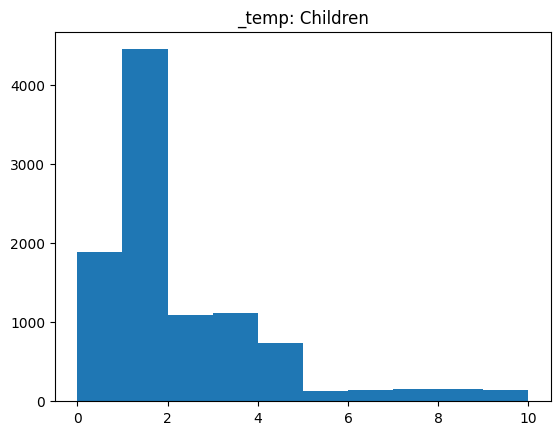

**!_TEMP!**
Nulls before imputation:  0
Unique value counts:
_temp
1.0     4446
0.0     1880
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: count, dtype: int64
Median: 1.0
count    10000.000000
mean         1.814000
std          1.916969
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: _temp, dtype: float64


In [26]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed
df['_temp'] = df['Children']
df['_temp'] = df['Children'].fillna(df['Children'].median())

# View histogram of _temp column to see the distribution of values
plt.hist(df['_temp'])
plt.title('_temp: Children')
plt.show()

# Show statistics of _temp column for comparison to original data
print('**!_TEMP!**')
print('Nulls before imputation: ', df['_temp'].isnull().sum())

#print('Total Unique:', df['_temp'].nunique())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
print('Median:', df['_temp'].median())
print(df['_temp'].describe())

- The `Children` data is right-skewed. <br><br>The median is less sensitive to skewness and outliers than the mean. Imputation using the median did not have a considerable effect on the median or mean of the data, and therefore it will be used for imputation.


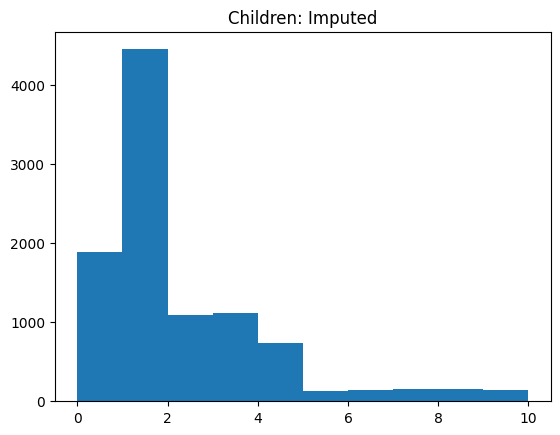

_Imputed Data_
Nulls before imputation:  0
Total Unique: 11
Unique value counts:
Children
1.0     4446
0.0     1880
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: count, dtype: int64
Median: 1.0
count    10000.000000
mean         1.814000
std          1.916969
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64


In [27]:
# Actual imputation of missing values with median

df['Children'].fillna(df['Children'].median(), inplace=True)

# View histogram of _temp column to see the distribution of values
plt.hist(df['Children'])
plt.title('Children: Imputed')
plt.show()

# Show statistics of _temp column for comparison to original data
print('_Imputed Data_')
print('Nulls before imputation: ', df['Children'].isnull().sum())
print('Total Unique:', df['Children'].nunique())
print('Unique value counts:', df['Children'].value_counts(), sep='\n')
print('Median:', df['Children'].median())
print(df['Children'].describe())

#### <span style="color:green">/Children Imputed</span>


---
#### <span style="color:blue">Impute Income Values</span>

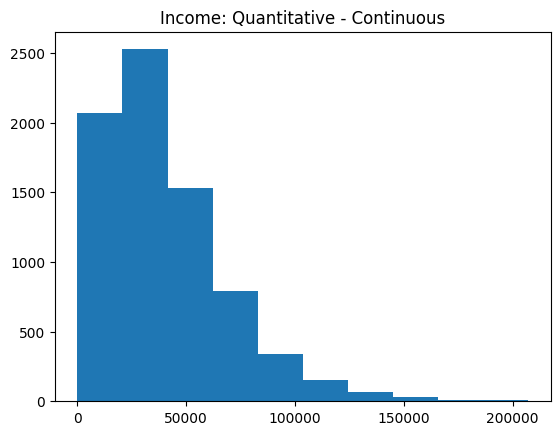

**!PRE IMPUTATION!**
Nulls before imputation:  2464
Total Unique: 7531
Unique value counts:
Income
14572.40    2
37132.97    2
55506.92    2
20474.03    2
26915.85    2
           ..
35093.92    1
41900.29    1
13511.95    1
34015.88    1
62682.63    1
Name: count, Length: 7531, dtype: int64
Median: 33942.28
count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64


In [28]:
# a: View histogram of Income column to see the distribution of values
plt.hist(df['Income'])
plt.title('Income: Quantitative - Continuous')
plt.show()


# print the median of the Income column
print('**!PRE IMPUTATION!**')
print('Nulls before imputation: ', df['Income'].isnull().sum())
print('Total Unique:', df['Income'].nunique())
print('Unique value counts:', df['Income'].value_counts(), sep='\n')
print('Median:', df['Income'].median())
print(df['Income'].describe())

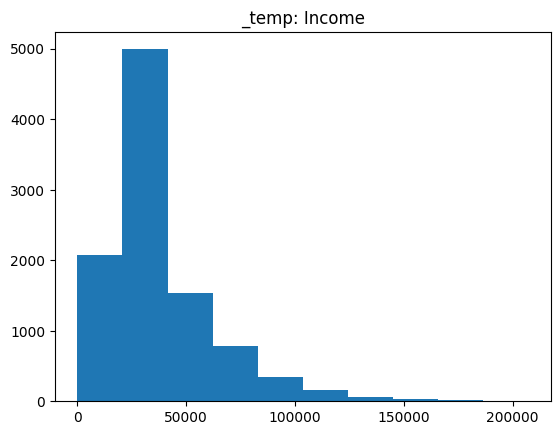

**!_TEMP!**
Nulls before imputation:  0
Total Unique: 7532
Unique value counts:
_temp
33942.28    2464
14572.40       2
37132.97       2
55506.92       2
20474.03       2
            ... 
35093.92       1
41900.29       1
13511.95       1
34015.88       1
62682.63       1
Name: count, Length: 7532, dtype: int64
Median: 33942.28
count     10000.000000
mean      38872.450471
std       25042.796229
min         154.080000
25%       23956.162500
50%       33942.280000
75%       46466.797500
max      207249.130000
Name: _temp, dtype: float64


In [29]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed
df['_temp'] = df['Income']
df['_temp'] = df['Income'].fillna(df['Income'].median())

# View histogram of _temp column to see the distribution of values
plt.hist(df['_temp'])
plt.title('_temp: Income')
plt.show()

# Show statistics of _temp column for comparison to original data
print('**!_TEMP!**')
print('Nulls before imputation: ', df['_temp'].isnull().sum())
print('Total Unique:', df['_temp'].nunique())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
print('Median:', df['_temp'].median())
print(df['_temp'].describe())

- The `Income` data is right-skewed. 
<br><br>Imputation using the median rather than the mean had a less considerable effect on both the median and mean of the data, and therefore will be used for imputation.


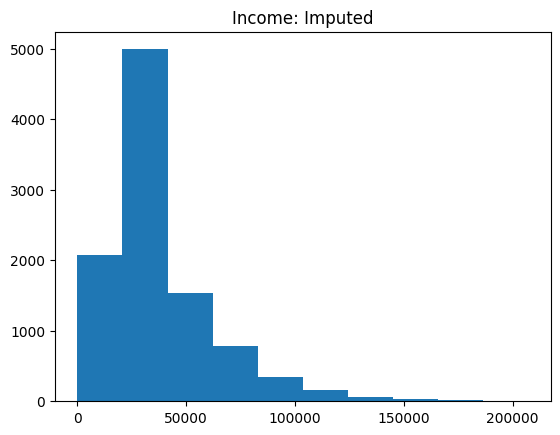

_Imputed Data_
Nulls before imputation:  0
Total Unique: 7532
Unique value counts:
Income
33942.28    2464
14572.40       2
37132.97       2
55506.92       2
20474.03       2
            ... 
35093.92       1
41900.29       1
13511.95       1
34015.88       1
62682.63       1
Name: count, Length: 7532, dtype: int64
Median: 33942.28
count     10000.000000
mean      38872.450471
std       25042.796229
min         154.080000
25%       23956.162500
50%       33942.280000
75%       46466.797500
max      207249.130000
Name: Income, dtype: float64


In [30]:
# Actual imputation of missing values with median

df['Income'].fillna(df['Income'].median(), inplace=True)

# View histogram of _temp column to see the distribution of values
plt.hist(df['Income'])
plt.title('Income: Imputed')
plt.show()

# Show statistics of _temp column for comparison to original data
print('_Imputed Data_')
print('Nulls before imputation: ', df['Income'].isnull().sum())
print('Total Unique:', df['Income'].nunique())
print('Unique value counts:', df['Income'].value_counts(), sep='\n')
print('Median:', df['Income'].median())
print(df['Income'].describe())

#### <span style="color:blue">/Income Imputed</span>


---
#### <span style="color:brown">Impute Age Values</span>

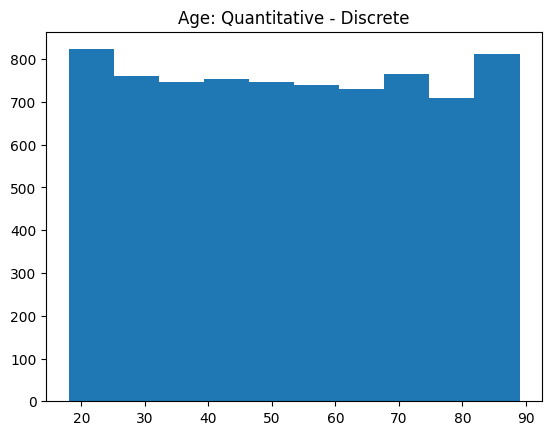

**!PRE IMPUTATION!**
Nulls before imputation:  2414
Total Unique: 72
Unique value counts:
Age
30.0    126
47.0    124
74.0    123
38.0    123
40.0    122
       ... 
75.0     90
82.0     90
63.0     90
51.0     89
36.0     85
Name: count, Length: 72, dtype: int64
Median: 53.0
count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64


In [31]:
# a: View histogram of Age column to see the distribution of values
plt.hist(df['Age'])
plt.title('Age: Quantitative - Discrete')
plt.show()


# print the median of the Age column
print('**!PRE IMPUTATION!**')
print('Nulls before imputation: ', df['Age'].isnull().sum())
print('Total Unique:', df['Age'].nunique())
print('Unique value counts:', df['Age'].value_counts(), sep='\n')
print('Median:', df['Age'].median())
print(df['Age'].describe())

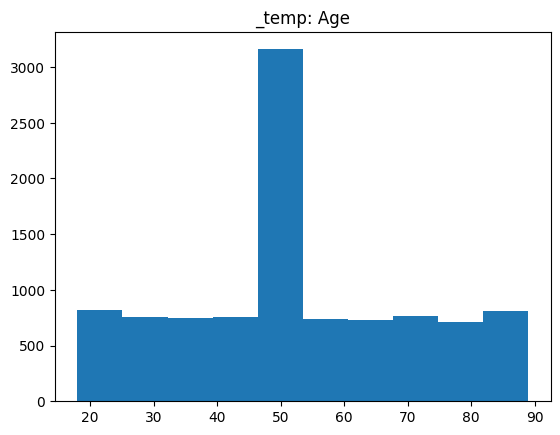

**!_TEMP!**
Nulls before imputation:  0
Total Unique: 72
Unique value counts:
_temp
53.0    2526
30.0     126
47.0     124
74.0     123
38.0     123
        ... 
75.0      90
82.0      90
63.0      90
51.0      89
36.0      85
Name: count, Length: 72, dtype: int64
Median: 53.0
count    10000.00000
mean        53.22430
std         17.99382
min         18.00000
25%         41.00000
50%         53.00000
75%         65.00000
max         89.00000
Name: _temp, dtype: float64


In [32]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed
df['_temp'] = df['Age']
df['_temp'] = df['Age'].fillna(df['Age'].median())

# View histogram of _temp column to see the distribution of values
plt.hist(df['_temp'])
plt.title('_temp: Age')
plt.show()

# Show statistics of _temp column for comparison to original data
print('**!_TEMP!**')
print('Nulls before imputation: ', df['_temp'].isnull().sum())
print('Total Unique:', df['_temp'].nunique())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
print('Median:', df['_temp'].median())
print(df['_temp'].describe())

- The `Age` data is evenly distributed. <br><br>imputing with the median maintains both the median and mean at approximately the same values.


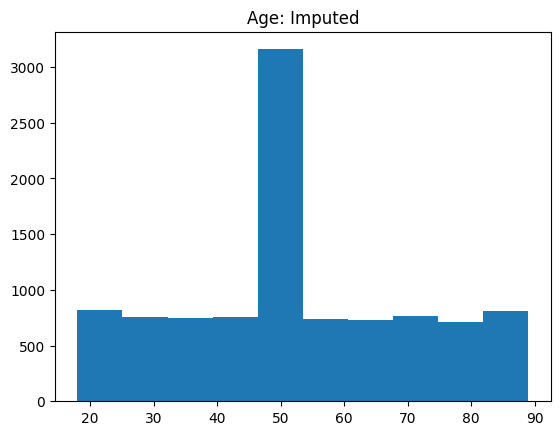

_Imputed Data_
Nulls before imputation:  0
Total Unique: 72
Unique value counts:
Age
53.0    2526
30.0     126
47.0     124
74.0     123
38.0     123
        ... 
75.0      90
82.0      90
63.0      90
51.0      89
36.0      85
Name: count, Length: 72, dtype: int64
Median: 53.0
count    10000.00000
mean        53.22430
std         17.99382
min         18.00000
25%         41.00000
50%         53.00000
75%         65.00000
max         89.00000
Name: Age, dtype: float64


In [33]:
# Actual imputation of missing values with median

df['Age'].fillna(df['Age'].median(), inplace=True)

# View histogram of _temp column to see the distribution of values
plt.hist(df['Age'])
plt.title('Age: Imputed')
plt.show()

# Show statistics of Age column for comparison to original data
print('_Imputed Data_')
print('Nulls before imputation: ', df['Age'].isnull().sum())
print('Total Unique:', df['Age'].nunique())
print('Unique value counts:', df['Age'].value_counts(), sep='\n')
print('Median:', df['Age'].median())
print(df['Age'].describe())

#### <span style="color:brown">/Age Imputed</span>


---
#### <span style="color:purple">Impute Initial_days Values</span>

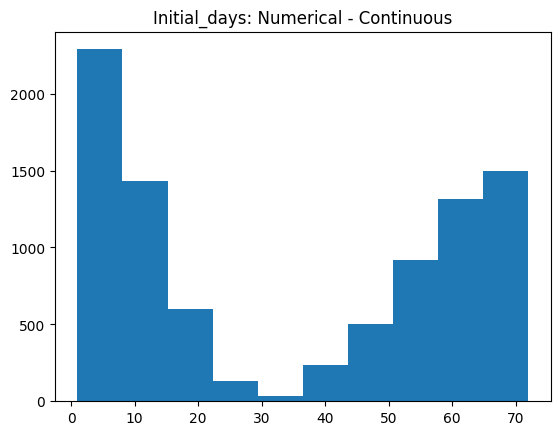

**!PRE IMPUTATION!**
Nulls before imputation:  1056
Total Unique: 8944
Unique value counts:
Initial_days
10.585770    1
64.630142    1
48.772686    1
67.036508    1
63.334689    1
            ..
9.216747     1
1.021594     1
10.261690    1
17.170461    1
70.850592    1
Name: count, Length: 8944, dtype: int64
Median: 34.44694129
count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64


In [34]:
# a: View histogram of Initial_days column to see the distribution of values
plt.hist(df['Initial_days'])
plt.title('Initial_days: Numerical - Continuous')
plt.show()


# print the median of the Children column
print('**!PRE IMPUTATION!**')
print('Nulls before imputation: ', df['Initial_days'].isnull().sum())
print('Total Unique:', df['Initial_days'].nunique())
print('Unique value counts:', df['Initial_days'].value_counts(), sep='\n')
print('Median:', df['Initial_days'].median())
print(df['Initial_days'].describe())

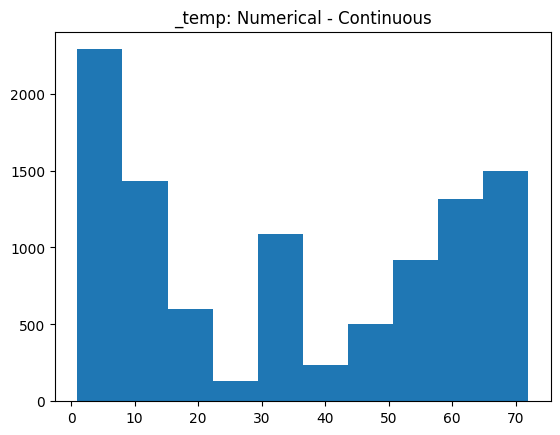

**!_TEMP!**
Nulls before imputation:  0
Total Unique: 8945
Unique value counts:
_temp
34.446941    1056
10.585770       1
64.630142       1
48.772686       1
67.036508       1
             ... 
9.216747        1
1.021594        1
10.261690       1
17.170461       1
70.850592       1
Name: count, Length: 8945, dtype: int64
Median: 34.44694129
count    10000.000000
mean        34.433651
std         24.860232
min          1.001981
25%          8.928987
50%         34.446941
75%         59.459981
max         71.981486
Name: _temp, dtype: float64


In [35]:
# Temporaty imputation of missing values with so original data is not changed imputation method is analyzed
df['_temp'] = df['Initial_days']
df['_temp'] = df['Initial_days'].fillna(df['Initial_days'].median())

# View histogram of _temp column to see the distribution of values
plt.hist(df['_temp'])
plt.title('_temp: Numerical - Continuous')
plt.show()

# Show statistics of _temp column for comparison to original data
print('**!_TEMP!**')
print('Nulls before imputation: ', df['_temp'].isnull().sum())
print('Total Unique:', df['_temp'].nunique())
print('Unique value counts:', df['_temp'].value_counts(), sep='\n')
print('Median:', df['_temp'].median())
print(df['_temp'].describe())

- For `Initial_days`, which shows a bi-modal distribution, both median and mode were considered for imputation. Using the mode resulted in a histogram that was almost identical post-imputation. However, it significantly distorted the mean and median values. 
<br><br>Imputing with the median, on the other hand, caused little distortion in the mean and median while maintaining a similar bi-modal distribution. Therefore, the median was used for imputation.

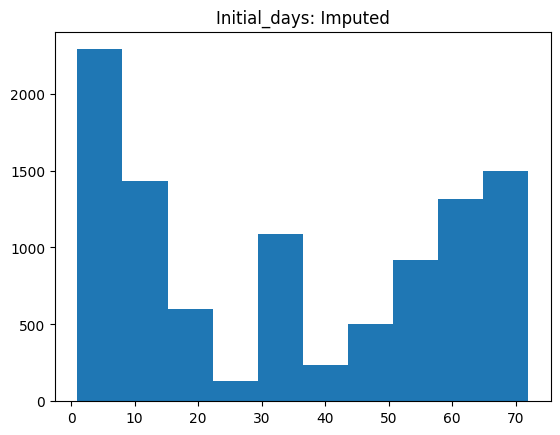

_Imputed Data_
Nulls after imputation:  0
Total Unique: 8945
Unique value counts:
Initial_days
34.446941    1056
10.585770       1
64.630142       1
48.772686       1
67.036508       1
             ... 
9.216747        1
1.021594        1
10.261690       1
17.170461       1
70.850592       1
Name: count, Length: 8945, dtype: int64
Median: 34.44694129
count    10000.000000
mean        34.433651
std         24.860232
min          1.001981
25%          8.928987
50%         34.446941
75%         59.459981
max         71.981486
Name: Initial_days, dtype: float64


In [36]:
# Actual imputation of missing values with median

df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)

# View histogram of _temp column to see the distribution of values
plt.hist(df['Initial_days'])
plt.title('Initial_days: Imputed')
plt.show()

# Show statistics of _temp column for comparison to original data
print('_Imputed Data_')
print('Nulls after imputation: ', df['Initial_days'].isnull().sum())
print('Total Unique:', df['Initial_days'].nunique())
print('Unique value counts:', df['Initial_days'].value_counts(), sep='\n')
print('Median:', df['Initial_days'].median())
print(df['Initial_days'].describe())


#### <span style="color:purple"> /Initial_days Imputed</span>

- Finally the '_temp' column will be dropped perminently as it is no longer needed. 

In [37]:
# Remove the '_temp' column, which was used for temporary calculations
df = df.drop('_temp', axis=1)

#Check to be sure '_temp' column was removed
df.head()

,CaseOrder,Customer_id,Interaction,...,Item6,Item7,Item8
Index,,,,,,,
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,...,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,...,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,...,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,...,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,...,3,4,3


#### **`</END IMPUTATION>`**
---

#### **`<BEGIN OUTLIERS>`**

### Detect and treat outliers 

- For variables that have numeric value, detection of outliers will be employeed. Given that one is not entierly sure if the distribution of the variables is normal, and because of the excellent visual information they provide, Boxlots and Histograms will be used to detect outliers ofver Z-scores. Variables with types that may contain outliers include:
- Children	
- Age	
- Income	
- VitD_levels	
- Doc_visits	
- Full_meals_eaten	
- VitD_supp	
- Initial_days	
- TotalCharge	
- Additional_charges

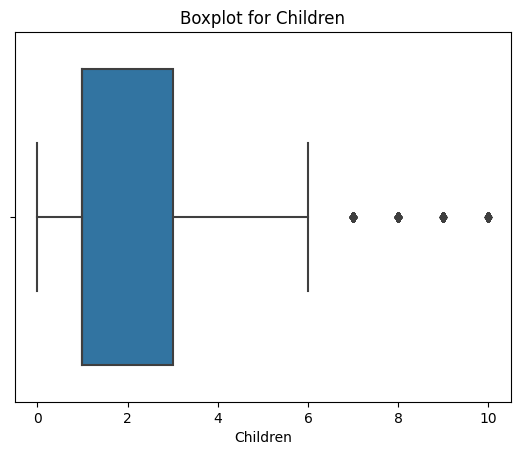

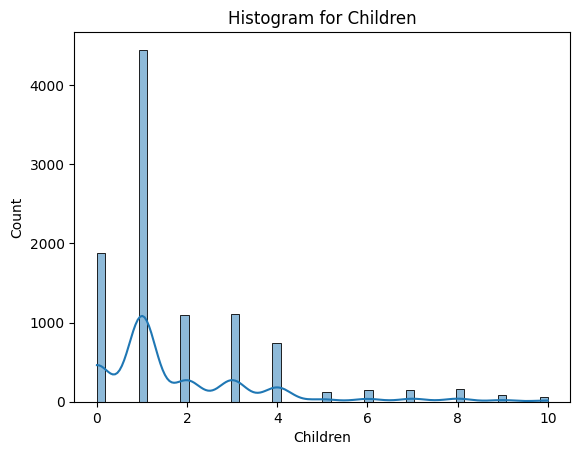

In [38]:
# Boxplot for 'Children'
sns.boxplot(x=df['Children'])
plt.title('Boxplot for Children')
plt.show()

# Histogram for 'Children'
sns.histplot(data=df, x='Children', kde=True)
plt.title('Histogram for Children')
plt.show()

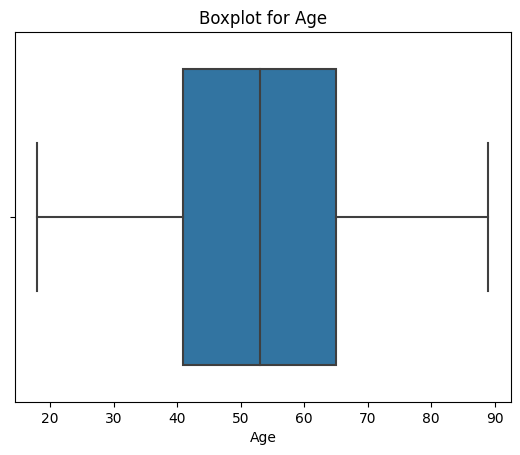

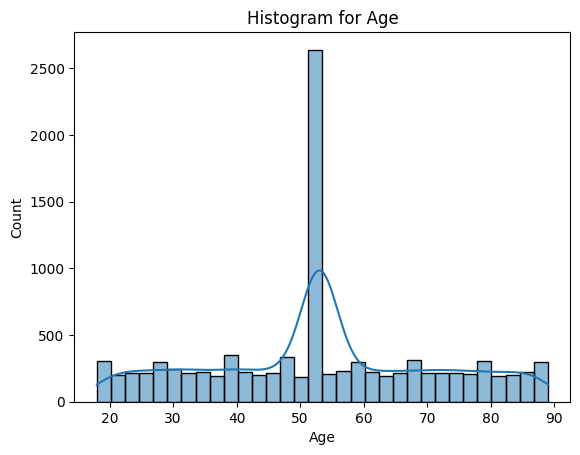

In [39]:
# Boxplot for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()

# Histogram for 'Age'
sns.histplot(data=df, x='Age', kde=True)
plt.title('Histogram for Age')
plt.show()

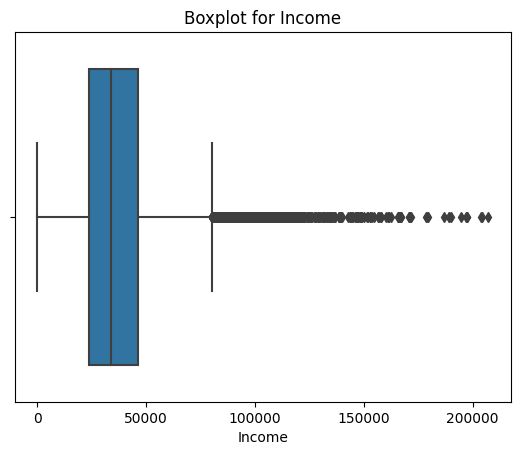

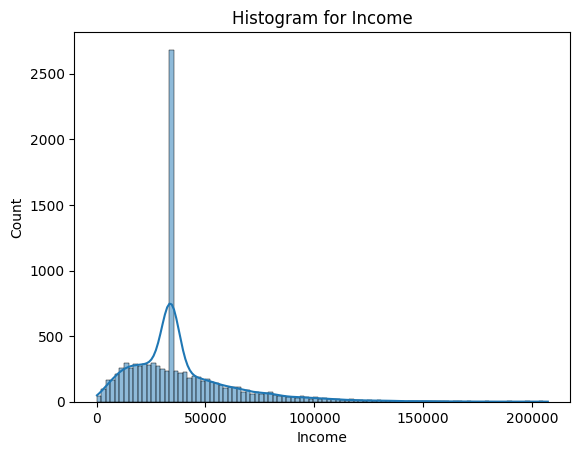

In [40]:
# Boxplot for 'Income'
sns.boxplot(x=df['Income'])
plt.title('Boxplot for Income')
plt.show()

# Histogram for 'Income'
sns.histplot(data=df, x='Income', kde=True)
plt.title('Histogram for Income')
plt.show()

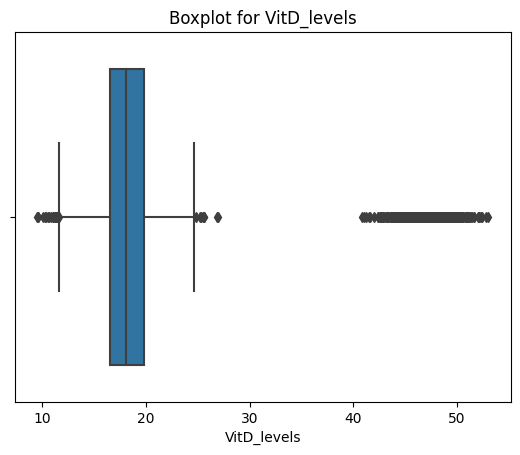

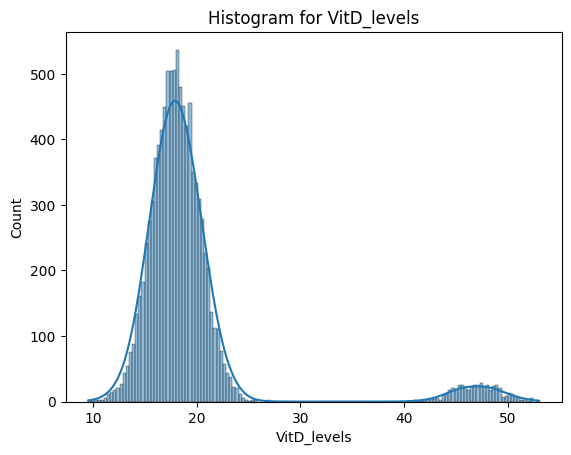

In [41]:
# Boxplot for 'VitD_levels'
sns.boxplot(x=df['VitD_levels'])
plt.title('Boxplot for VitD_levels')
plt.show()

# Histogram for 'VitD_levels'
sns.histplot(data=df, x='VitD_levels', kde=True)
plt.title('Histogram for VitD_levels')
plt.show()

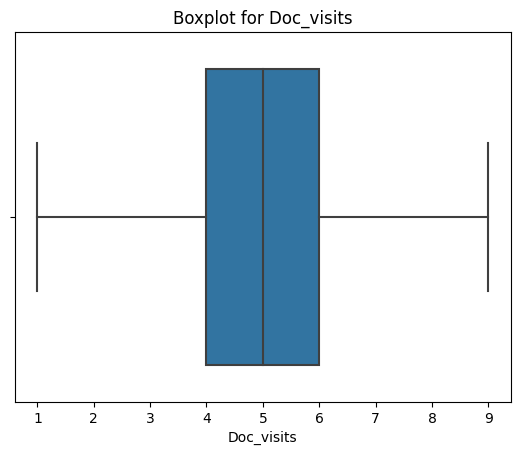

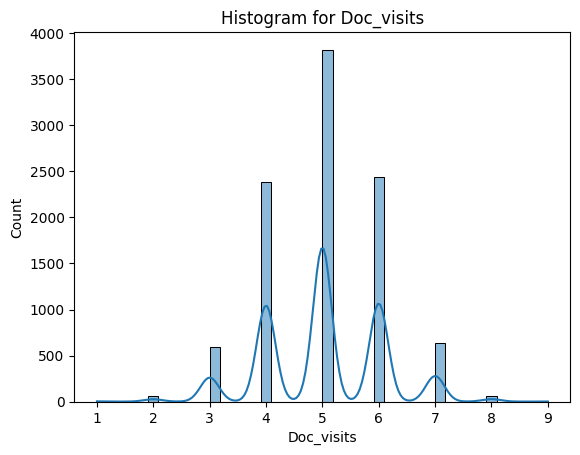

In [42]:
# Boxplot for 'Doc_visits'
sns.boxplot(x=df['Doc_visits'])
plt.title('Boxplot for Doc_visits')
plt.show()

# Histogram for 'Doc_visits'
sns.histplot(data=df, x='Doc_visits', kde=True)
plt.title('Histogram for Doc_visits')
plt.show()

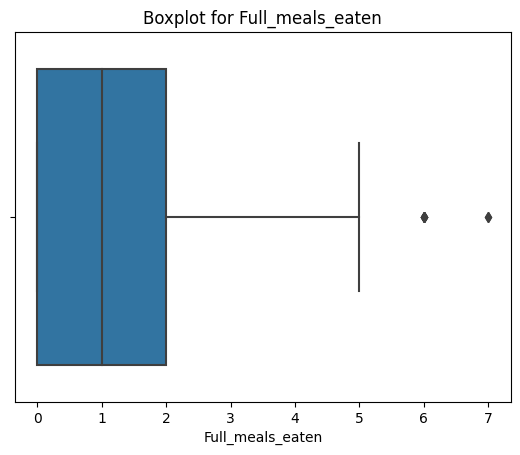

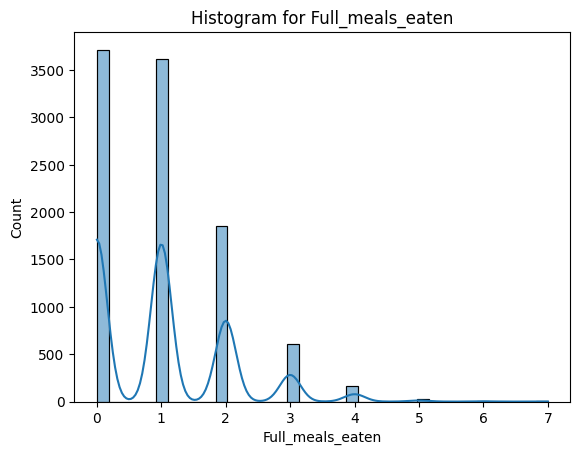

In [43]:
# Boxplot for 'Full_meals_eaten'
sns.boxplot(x=df['Full_meals_eaten'])
plt.title('Boxplot for Full_meals_eaten')
plt.show()

# Histogram for 'Full_meals_eaten'
sns.histplot(data=df, x='Full_meals_eaten', kde=True)
plt.title('Histogram for Full_meals_eaten')
plt.show()

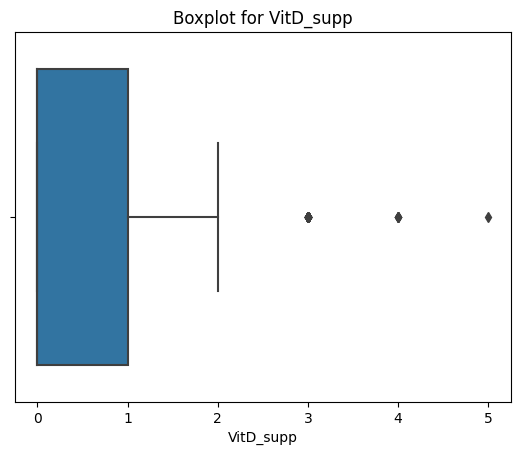

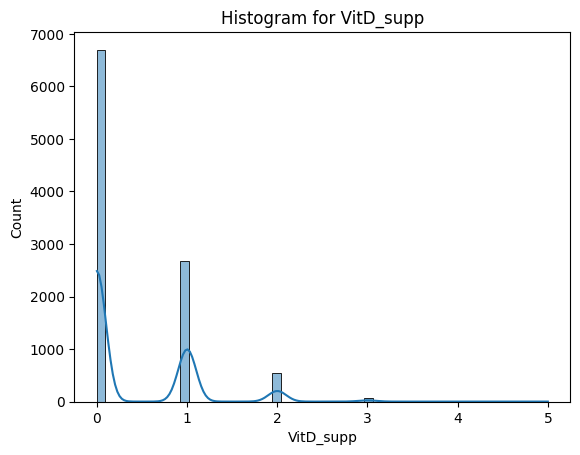

In [44]:
# Boxplot for 'VitD_supp'
sns.boxplot(x=df['VitD_supp'])
plt.title('Boxplot for VitD_supp')
plt.show()

# Histogram for 'VitD_supp'
sns.histplot(data=df, x='VitD_supp', kde=True)
plt.title('Histogram for VitD_supp')
plt.show()

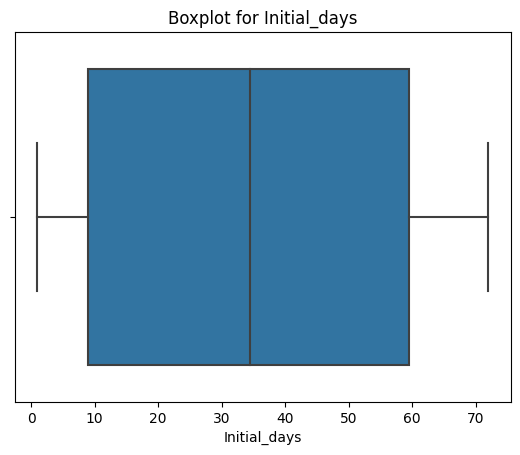

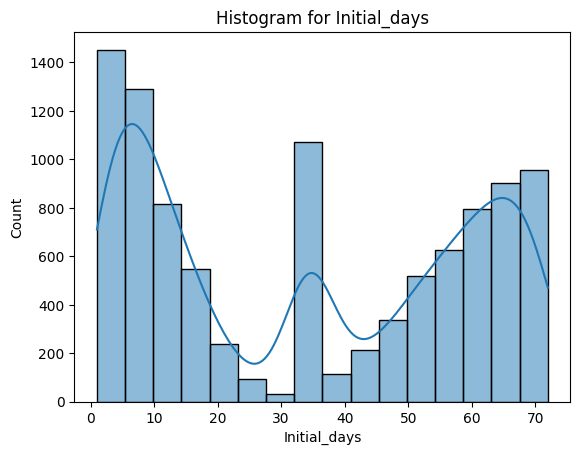

In [45]:
# Boxplot for 'Initial_days'
sns.boxplot(x=df['Initial_days'])
plt.title('Boxplot for Initial_days')
plt.show()

# Histogram for 'Initial_days'
sns.histplot(data=df, x='Initial_days', kde=True)
plt.title('Histogram for Initial_days')
plt.show()

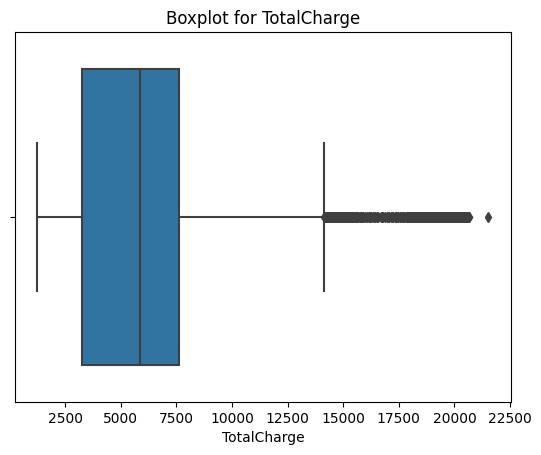

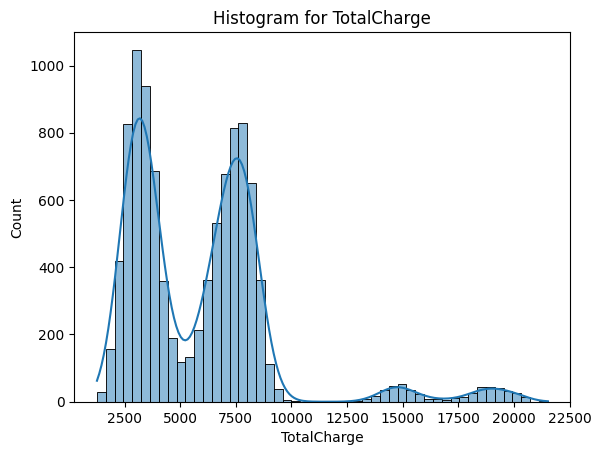

In [46]:
# Boxplot for 'TotalCharge'
sns.boxplot(x=df['TotalCharge'])
plt.title('Boxplot for TotalCharge')
plt.show()

# Histogram for 'TotalCharge'
sns.histplot(data=df, x='TotalCharge', kde=True)
plt.title('Histogram for TotalCharge')
plt.show()

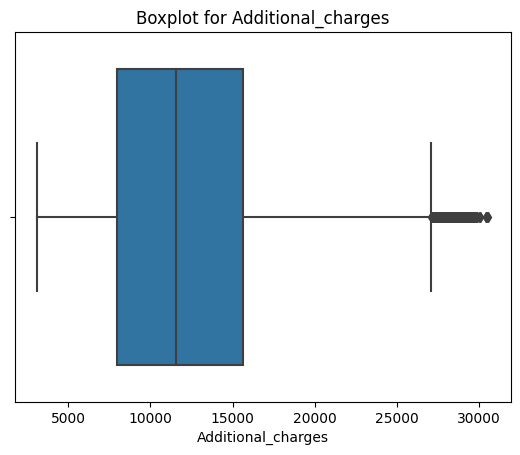

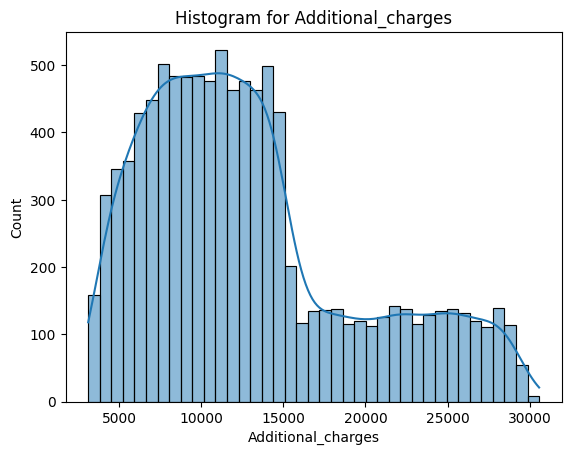

In [47]:
# Boxplot for 'Additional_charges'
sns.boxplot(x=df['Additional_charges'])
plt.title('Boxplot for Additional_charges')
plt.show()

# Histogram for 'Additional_charges'
sns.histplot(data=df, x='Additional_charges', kde=True)
plt.title('Histogram for Additional_charges')
plt.show()

- For the categories 'Item1', 'Item2',...,'Item8', a series of unique values for each category is created. In all 8 lists, one can quickly check for any values outside the range described by the data dictionary (1-8)

In [48]:
unique_items_lists = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5',
                         'Item6', 'Item7', 'Item8']].apply(pd.Series.unique).tolist()
unique_items_lists

[array([3, 2, 4, 1, 5, 7, 6, 8]),
 array([3, 4, 5, 1, 2, 6, 7]),
 array([2, 3, 4, 5, 1, 6, 7, 8]),
 array([2, 4, 3, 5, 6, 1, 7]),
 array([4, 3, 5, 2, 6, 1, 7]),
 array([3, 4, 5, 2, 6, 1, 7]),
 array([3, 5, 4, 2, 6, 1, 7]),
 array([4, 3, 5, 6, 2, 1, 7])]

### Retaining Outliers

- After carefully considering the outliers, all values appear to be within a reasonable range given what they represent and may therefore be useful for future analysis. Given that the outliers in each of these variables may in fact be legitimate values, it seems the best course of action is to note and visualize them rather than eliminate them from the dataset. This way they will be retained for future analysts to consider. This decision is based on the lack of additional information to justify their removal, as well as their potential importance within the context of the research question.

- In the context of healthcare, outliers often provide important pieces of information for potential discoveries. For example, a blood test result that deviates significantly from the mean could be an indicator of a medical condition.


## **`</END OUTLIERS>`**
---

## **`<BEGIN REXPRESSION>`**

- Re-expression is not a required part of this assessment. However, this performance assessment offers a good opportunity to practice re-expression. The dataset would likely benefit from having 'Yes/No' values re-expressed as '1/0' for future analytical models.
  
- For this exercise, only columns that contain 'Yes/No' values and have no missing values will be re-expressed as '1/0'.
  
- The variables `Anxiety` and `Overweight` will not be re-expressed as '0/1' because we imputed the missing values with the term 'Missing.' As a result, these variables are not binary-categorical, which is the criterion for this re-expression exercise.
  
- The variables that meet these criteria for re-expression are: `ReAdmis`, `HighBlood`, `Stroke`, `Arthritis`, `Diabetes`, `Hyperlipidemia`, `BackPain`, `Allergic_rhinitis`, `Reflux_esophagitis`, and `Asthma`.


In [49]:
# Print the unique values in each column and the number of times each value appears in each column is assigned to two appropriate variables for the variables: `ReAdmis`, `HighBlood`, `Stroke`, `Arthritis`, `Diabetes`, `Hyperlipidemia`, `BackPain`, `Allergic_rhinitis`, `Reflux_esophagitis`, `Asthma`.
print('Unique values for each column:')
print(df[['ReAdmis', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
      'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].nunique())
print(df[['ReAdmis', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
      'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].value_counts())

Unique values for each column:
ReAdmis               2
HighBlood             2
Stroke                2
Arthritis             2
Diabetes              2
Hyperlipidemia        2
BackPain              2
Allergic_rhinitis     2
Reflux_esophagitis    2
Asthma                2
dtype: int64
ReAdmis  HighBlood  Stroke  Arthritis  Diabetes  Hyperlipidemia  BackPain  Allergic_rhinitis  Reflux_esophagitis  Asthma
No       No         No      No         No        No              No        No                 No                  No        143
                                                                                              Yes                 No        102
         Yes        No      No         No        No              No        No                 No                  No         96
         No         No      No         No        No              Yes       No                 No                  No         95
                                                                 No        Yes     

- Rexpress 

In [50]:
# Use df.replace to replace 1 with 'Yes' and 0 with 'No' for variables: `ReAdmis`, `HighBlood`, `Stroke`, `Arthritis`, `Diabetes`, `Hyperlipidemia`, `BackPain`, `Allergic_rhinitis`, `Reflux_esophagitis`, `Asthma`.

df['ReAdmis'] = df['ReAdmis'].replace({'Yes': 1, 'No': 0})
df['HighBlood'] = df['HighBlood'].replace({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].replace({'Yes': 1, 'No': 0})
df['Arthritis'] = df['Arthritis'].replace({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].replace({'Yes': 1, 'No': 0})
df['Hyperlipidemia'] = df['Hyperlipidemia'].replace({'Yes': 1, 'No': 0})
df['BackPain'] = df['BackPain'].replace({'Yes': 1, 'No': 0})
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].replace({'Yes': 1, 'No': 0})
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].replace(
    {'Yes': 1, 'No': 0})
df['Asthma'] = df['Asthma'].replace({'Yes': 1, 'No': 0})

- Confirm rexpression of variables

In [51]:
# The unique values in each column and the number of times each value appears in each column is assigned to two appropriate variables.
unq_ReAdmis_vals = df['ReAdmis'].value_counts()
unq_HighBlood_vals = df['HighBlood'].value_counts()
unq_Stroke_vals = df['Stroke'].value_counts()
unq_Arthritis_vals = df['Arthritis'].value_counts()
unq_Diabetes_vals = df['Diabetes'].value_counts()
unq_Hyperlipidemia_vals = df['Hyperlipidemia'].value_counts()
unq_BackPain_vals = df['BackPain'].value_counts()
unq_Allergic_rhinitis_vals = df['Allergic_rhinitis'].value_counts()
unq_Reflux_esophagitis_vals = df['Reflux_esophagitis'].value_counts()
unq_Asthma_vals = df['Asthma'].value_counts()

# Print the unique values for each column

print('Unique ReAdmis values: ', unq_ReAdmis_vals, sep='\n', end='\n\n')
print('Unique HighBlood values: ', unq_HighBlood_vals, sep='\n', end='\n\n')
print('Unique Stroke values: ', unq_Stroke_vals, sep='\n', end='\n\n')
print('Unique Arthritis values: ', unq_Arthritis_vals, sep='\n', end='\n\n')
print('Unique Diabetes values: ', unq_Diabetes_vals, sep='\n', end='\n\n')
print('Unique Hyperlipidemia values: ',
      unq_Hyperlipidemia_vals, sep='\n', end='\n\n')
print('Unique BackPain values: ', unq_BackPain_vals, sep='\n', end='\n\n')
print('Unique Allergic_rhinitis values: ',
      unq_Allergic_rhinitis_vals, sep='\n', end='\n\n')
print('Unique Reflux_esophagitis values: ',
      unq_Reflux_esophagitis_vals, sep='\n', end='\n\n')
print('Unique Asthma values: ', unq_Asthma_vals, sep='\n', end='\n\n')

Unique ReAdmis values: 
ReAdmis
0    6331
1    3669
Name: count, dtype: int64

Unique HighBlood values: 
HighBlood
0    5910
1    4090
Name: count, dtype: int64

Unique Stroke values: 
Stroke
0    8007
1    1993
Name: count, dtype: int64

Unique Arthritis values: 
Arthritis
0    6426
1    3574
Name: count, dtype: int64

Unique Diabetes values: 
Diabetes
0    7262
1    2738
Name: count, dtype: int64

Unique Hyperlipidemia values: 
Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64

Unique BackPain values: 
BackPain
0    5886
1    4114
Name: count, dtype: int64

Unique Allergic_rhinitis values: 
Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64

Unique Reflux_esophagitis values: 
Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64

Unique Asthma values: 
Asthma
0    7107
1    2893
Name: count, dtype: int64



- The value types and counts after re-expression accurately map onto the value counts before re-expression.


#### **`</END REEXPRESSION>`**

___


## Export Cleaned Data to a new CSV file:`'medical_clean_data_final.csv'`

In [52]:
# export the cleaned data to a csv file
df.to_csv('medical_clean_data_final.csv')

___
## **`<BEGIN PCA>`**

#### Section E: PCA

- Steps to Perform PCA (WGU Panopto, 2023):
    1. `Import`: Import Necessary Libraries and Packages and Cleaned Data
    2. `Define`: Define Features/Variables for PCA
    3. `Normalize`: Normalize Data and Apply PCA
    4. `Generate`: Generate Output of PCA Loadings
    5. `Selecting`: Select Principal Components 

In [53]:
# Import clean data set to new dataframe med_data.
med_data = pd.read_csv('medical_clean_data_final.csv')

# Set the maximum number of columns to display to 6 to save space for exersize
# pd.set_option('display.max_columns', 6)

# Display the first five rows of the data
med_data.head()

,Index,CaseOrder,Customer_id,...,Item6,Item7,Item8
0,0,1,C412403,...,3,3,4
1,1,2,Z919181,...,4,3,3
2,2,3,F995323,...,4,3,3
3,3,4,A879973,...,5,5,5
4,4,5,C544523,...,3,4,3


- To remain consistent, the additional 'Index' column will be addressed and dropped as was done in the beginning of the project. 

In [54]:
# Drop 'Index': 0' column.
med_data = med_data.drop('Index', axis=1)

# add a new column to the dataframe called 'Index' that will be used as the index
med_data['Index'] = range(len(med_data))

# set the index to the new 'Index' column
med_data = med_data.set_index('Index')

# View the first 5 rows of the dataframe
med_data.head()

,CaseOrder,Customer_id,Interaction,...,Item6,Item7,Item8
Index,,,,,,,
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,...,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,...,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,...,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,...,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,...,3,4,3


- 2. `Define`: Define Features/Variables for PCA

In [55]:
# Select the numeric continuous variables from the data, and assign them to a new dataframe called `med`. View the first five rows of the new dataframe.
med = med_data[['Lat', 'Lng', 'Age', 'Income', 'VitD_levels',
                'Initial_days', 'TotalCharge', 'Additional_charges']]

# Display the first five rows of the new DataFrame
med.head()

,Lat,Lng,Age,...,Initial_days,TotalCharge,Additional_charges
Index,,,,,,,
0,34.34960,-86.72508,53.0,...,10.585770,3191.048774,17939.403420
1,30.84513,-85.22907,51.0,...,15.129562,4214.905346,17612.998120
2,43.54321,-96.63772,53.0,...,4.772177,2177.586768,17505.192460
3,43.89744,-93.51479,78.0,...,1.714879,2465.118965,12993.437350
4,37.59894,-76.88958,22.0,...,1.254807,1885.655137,3716.525786


- 3. `Normalize`: Normalize Data and Apply PCA

In [56]:
# Normalize the data by using Standardization. (Mean Normalization) (prevents on variable from dominating the others due to their scale differences)

# Calculate the mean and standard deviation of each column in the data
med_mean = med.mean()
med_std = med.std()

# Normalize the data using standardization
med_normalized = (med - med_mean) / med_std

# Display the first five rows of the new normalized DataFrame
med_normalized.head()

,Lat,Lng,Age,...,Initial_days,TotalCharge,Additional_charges
Index,,,,,,,
0,-0.814627,0.297120,-0.012465,...,-0.959278,-0.799539,0.764967
1,-1.463232,0.395502,-0.123615,...,-0.776505,-0.496404,0.715078
2,0.886921,-0.354771,-0.012465,...,-1.193129,-1.099597,0.698600
3,0.952482,-0.149396,1.376900,...,-1.316109,-1.014466,0.009004
4,-0.213241,0.943937,-1.735279,...,-1.334615,-1.186029,-1.408920


In [57]:
# Perform PCA on the normalized data
# Create a new dataframe called 'pca` that contains the Principal Components of the normalized data based on the number of columns in the normalized data.

pca = PCA(n_components=med_normalized.shape[1])

In [58]:
# Fit the PCA model to the normalized data.
pca.fit(med_normalized)

PCA(n_components=8)

In [59]:
# Take normailzed datafame and transform it into the principal components and assign it to a new dataframe called med_pca.
med_pca = pd.DataFrame(pca.transform(med_normalized),
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

- 4. `Generate`: Generate Output of PCA Loadings

In [60]:
# Generate the PCA loading vectors for each principal component and assign them to a new dataframe called loadings.
loadings = pd.DataFrame(pca.components_.T, columns=[
                        'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=med.columns)
loadings

,PC1,PC2,PC3,...,PC6,PC7,PC8
Lat,-0.016177,-0.017004,0.707483,...,-0.700692,-0.009624,-0.000140
Lng,-0.005274,0.018616,-0.704183,...,-0.696105,0.011692,0.002035
Age,0.083836,0.701761,0.007919,...,-0.003361,-0.706879,-0.016361
Income,-0.006915,-0.005702,-0.050909,...,-0.129027,-0.007683,-0.001145
VitD_levels,0.541198,-0.054857,-0.003677,...,0.047520,-0.022947,0.544142
Initial_days,0.446042,-0.073142,0.010227,...,-0.073516,-0.005860,0.451180
TotalCharge,0.702624,-0.079513,0.002472,...,-0.011979,0.020786,-0.706688
Additional_charges,0.084287,0.701557,0.028556,...,-0.001505,0.706428,0.025791


- 5. `Selecting Principal Components` 
 <br><br>(Keep the most meaningful using the Kaiser Rule: PC's with eigenvalues greater than 1(WGU Panopto, 2023))

In [61]:
# calculate covariance and vectors then define eigenvalues before creating scree plot
cov_matrix = np.dot(med_normalized.T, med_normalized) / med.shape[0]

# Calculate the eigenvalues of the covariance matrix
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
               for eigenvector in pca.components_]

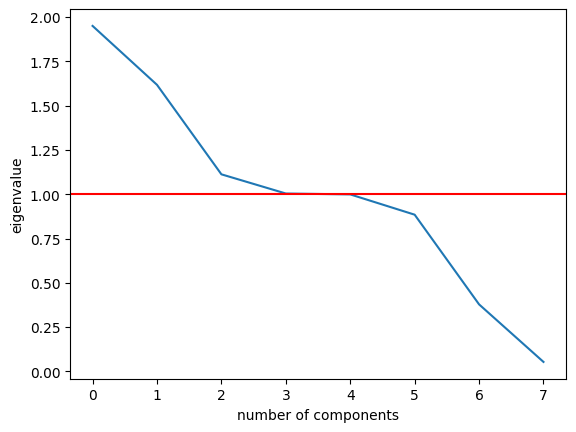

Eigenvalues: [1.9498722468920846, 1.6174776396142674, 1.1123305636780878, 1.0040269102027835, 0.999015795466755, 0.8845399213418099, 0.37836478502893073, 0.05357213777527951]


In [62]:
# Create a scree plot of the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.savefig('ScreePlot.png')
plt.axhline(y=1, color='r', linestyle='-')
plt.savefig('ScreePlot.png')
plt.show()

# Print the eigenvalues
print("Eigenvalues: " + str(eigenvalues))

#### PCA Benefit:
- PCA is a tool that can make complex data easier to understand and work with. It is an unsupervised learning technique that offers a number of benefits by reducing the dimensionality of the data, It can speed up data processing times significantly, making it a real time-saver for businesses that rely on quick decisions. Plus, it can improve the accuracy of predictive models, making them more reliable. It's also great for simplifying complicated data into easy-to-understand visuals. All of these benefits make PCA an invaluable tool for any organization looking to make smarter, data-driven decisions (Bigadid, 2023).

### Summary Analysis of PCA


#### Data Preprocessing:
- The dataset was cleaned and normalized to ensure that all features were on the same scale. Normalization is crucial in PCA because the algorithm is sensitive to the magnitudes of the variables.

#### PCA Execution:
- PCA was performed on the normalized dataset, generating eight principal components. Each principal component is a linear combination of the original features, and they are orthogonal to each other, meaning they are uncorrelated.

#### Eigenvalues and Scree Plot:
- The eigenvalues obtained from the PCA were `[1.95, 1.62, 1.11, 1.00, 0.999, 0.885, 0.378, 0.054]`. The scree plot visualizes these eigenvalues, helping to decide the number of principal components to retain. A red horizontal line is drawn at eigenvalue = 1 as a common threshold for selecting significant principal components  (WGU Panopto, 2023).

#### Some Interpritations:

1. **Significant Principal Components**: The first four principal components have eigenvalues greater than 1, suggesting that they capture a significant amount of the total variance in the dataset . 
   
2. **Variance Captured**: The eigenvalues indicate that the initial principal components capture more variance compared to the latter ones. The sharp drop in eigenvalue magnitude suggests that the first few components are the most informative.

3. **Unusual Scree Plot**: The scree plot showed a curve resembling `(-x^3)`, which is unusual but not necessarily indicative of an error. It suggests that the principal components' ability to explain the dataset's variance decreases sharply, which warrants further investigation.

The scree plot and eigenvalues serve as a valuable guide for deciding how many principal components to retain for subsequent analyses. Given the eigenvalues and the scree plot, focusing on the first four principal components seems to be a rational approach.



# Closing Summary and Some Limitations

 In this project, we undertook an initial examination of medical readmissions, a critical issue in healthcare affecting both patients and medical institutions. The project began by framing a research question focused on identifying variables that could potentially predict patient readmissions. A comprehensive data cleaning plan was executed, tackling duplicates, missing values, and outliers to ensure the integrity and quality of our dataset. Additionally, it went further to include the re-expression of categorical variables. Code snippets and visualizations were interspersed throughout to enhance clarity and understanding. Towards the end, Principal Component Analysis (PCA) was used to explore dimensionality reduction, allowing us to concentrate on variables of significance.
 
Limitations are an inherent aspect of any data analysis project. One notable limitation is how missing values are handled. In an ideal scenario, obtaining the actual missing data directly from hospitals would provide the most accurate results. However, the absence of this option means that methods employed to fill in missing values have the potential to skew the analysis. The use of Univariate Imputation methods such as the mean, median, and mode can distort data distribution. Boxplots, though useful for spotting outliers, do not offer exact numerical values, necessitating supplementary methods like histograms for a more accurate assessment.

These limitations bear significant weight when considering the research question. The scope may require variables not included in the original dataset. Variables like Income, Job, and Marital Status are derived from the insurance holder, who may not be the patient. Decisions can be made based on assumptions, which may or may not be accurate and could affect the analysis.

The impact of these limitations could be considerable, particularly concerning the study's conclusions about factors contributing to patients' risk for readmission. Choices made during data cleaning, especially around missing values and outliers, could misrepresent the significance of specific variables, potentially leading to inaccurate conclusions.

 While the project did not unearth groundbreaking discoveries, it laid the groundwork for future exploration by presenting a structured, replicable approach to data cleaning in healthcare analytics.

## References

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#_

- Western Governors University. (2023, September 11). D206 - EMA dataset. Retrieved from https://web5.wgu.edu/aap/content/d206-ema.html

- Getting Started with D206 | PCA." (2023, September 12). WGU Panopto. Retrieved from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3bcc452f-fa35-43be-b69f-b05901356f95

- Bigabid. (2023, September 12). What is 'PCA' and how can I use it? Retrieved September 11, 2023, from https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/
